In [ ]:
#Importing all necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
%matplotlib inline
sns.set_style("darkgrid")
import pandas as pd
import numpy as np
import os
from google.colab import drive

In [ ]:
drive.mount("/content/drive")
crimes_data = pd.read_csv("/content/drive/MyDrive/Crime_data/Little_Rock_Police_Department_Statistics_2017_to_Year_to_Date.csv")
crimes_data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0      10/08/2017 10:26:00 AM     2017-126075               81.0          11A   
1      01/08/2018 10:30:00 PM     2018-003294               42.0          11A   
2      06/20/2017 12:00:00 AM     2018-074365               82.0          11A   
3      12/02/2018 02:00:00 PM     2018-153317               51.0          11A   
4      04/23/2020 09:00:00 AM     2020-046670               82.0          11A   
...                       ...             ...                ...          ...   
92249  12/03/2022 10:16:00 PM     2023-300021               55.0          23C   
92250  12/28/2022 09:30:00 AM     2022-303434               42.0          23H   
92251  01/16/2023 05:22:00 PM     2023-006651               40.0          23F   
92252  12/29/2022 01:50:00 AM     2022-303439               42.0          23H   
92253  12/30/2022 04:15:00 PM     2023-300003               60.0          23F   

            OFFENSE_DESCRIPTION WEAPON_TYPE   INCIDENT_LOCATION         CITY  \
0                          RAPE         NaN                 NaN          NaN   
1                          RAPE         NaN                 NaN          NaN   
2                          RAPE         NaN                 NaN          NaN   
3                          RAPE         NaN                 NaN          NaN   
4                          RAPE         NaN                 NaN          NaN   
...                         ...         ...                 ...          ...   
92249               SHOPLIFTING         NaN     2711 MARKHAM ST  LITTLE ROCK   
92250         ALL OTHER LARCENY         NaN      1 AIRPORT ROAD  LITTLE ROCK   
92251  THEFT FROM MOTOR VEHICLE         NaN      401 S SCOTT ST  LITTLE ROCK   
92252         ALL OTHER LARCENY         NaN    7001 ZUEBER ROAD  LITTLE ROCK   
92253  THEFT FROM MOTOR VEHICLE         NaN  8321 CANTRELL ROAD  LITTLE ROCK   

      STATE      ZIP  LATITUDE  LONGITUDE Location 1 Offense Status  
0       NaN      NaN       NaN        NaN        NaN             OP  
1       NaN      NaN       NaN        NaN        NaN             OP  
2       NaN      NaN       NaN        NaN        NaN             AJ  
3       NaN      NaN       NaN        NaN        NaN             EX  
4       NaN      NaN       NaN        NaN        NaN             OP  
...     ...      ...       ...        ...        ...            ...  
92249    AR  72205.0       NaN        NaN        NaN             OP  
92250    AR  72202.0       NaN        NaN        NaN             OP  
92251    AR  72201.0       NaN        NaN        NaN             OP  
92252    AR  72206.0       NaN        NaN        NaN             OP  
92253    AR  72227.0       NaN        NaN        NaN             OP  

[92254 rows x 14 columns]

In [ ]:
crimes_data["CITY"].unique()
#dd=(crimes_data["CITY"] == "LITTLE ROCK")
#dd.sum()

array([nan, 'LITTLE ROCK', 'MABELVALE', 'ALEXANDER', 'NORTH LITTLE ROCK',
       'LITTLE  ROCK', 'LITTLEROCK', '110'], dtype=object)

In [ ]:
crimes_data.dtypes

INCIDENT_DATE           object
INCIDENT_NUMBER         object
LOCATION_DISTRICT      float64
OFFENSE_CODE            object
OFFENSE_DESCRIPTION     object
WEAPON_TYPE             object
INCIDENT_LOCATION       object
CITY                    object
STATE                   object
ZIP                    float64
LATITUDE               float64
LONGITUDE              float64
Location 1              object
Offense Status          object
dtype: object

In [ ]:
crimes_data.isnull().sum()

INCIDENT_DATE              0
INCIDENT_NUMBER            0
LOCATION_DISTRICT        100
OFFENSE_CODE               0
OFFENSE_DESCRIPTION        0
WEAPON_TYPE            71582
INCIDENT_LOCATION       1222
CITY                    1222
STATE                   1222
ZIP                     1224
LATITUDE                3183
LONGITUDE               3183
Location 1              3183
Offense Status            45
dtype: int64

In [ ]:
#crimes_data.WEAPON_TYPE = crimes_data.WEAPON_TYPE.fillna('NotAv')
#crimes_data

In [ ]:
crimes_data.isnull().sum()

INCIDENT_DATE              0
INCIDENT_NUMBER            0
LOCATION_DISTRICT        100
OFFENSE_CODE               0
OFFENSE_DESCRIPTION        0
WEAPON_TYPE            71582
INCIDENT_LOCATION       1222
CITY                    1222
STATE                   1222
ZIP                     1224
LATITUDE                3183
LONGITUDE               3183
Location 1              3183
Offense Status            45
dtype: int64

# **Cleaning**

<Axes: >

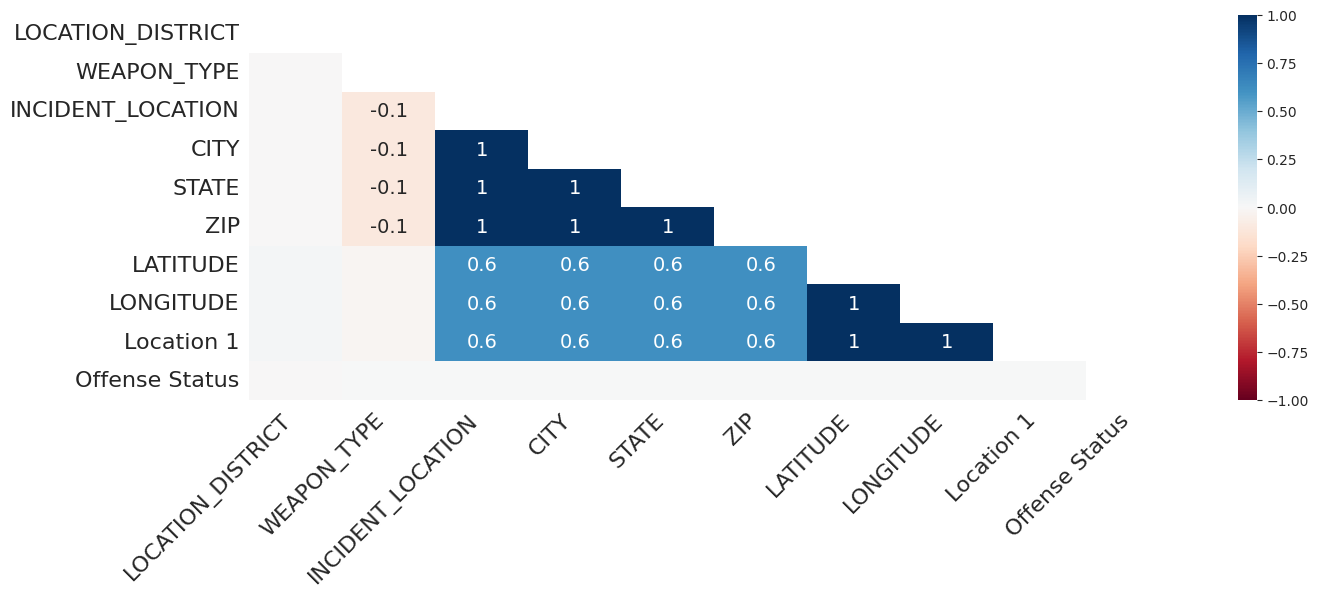

In [ ]:
msno.heatmap(crimes_data,figsize=(15, 5))

<Axes: >

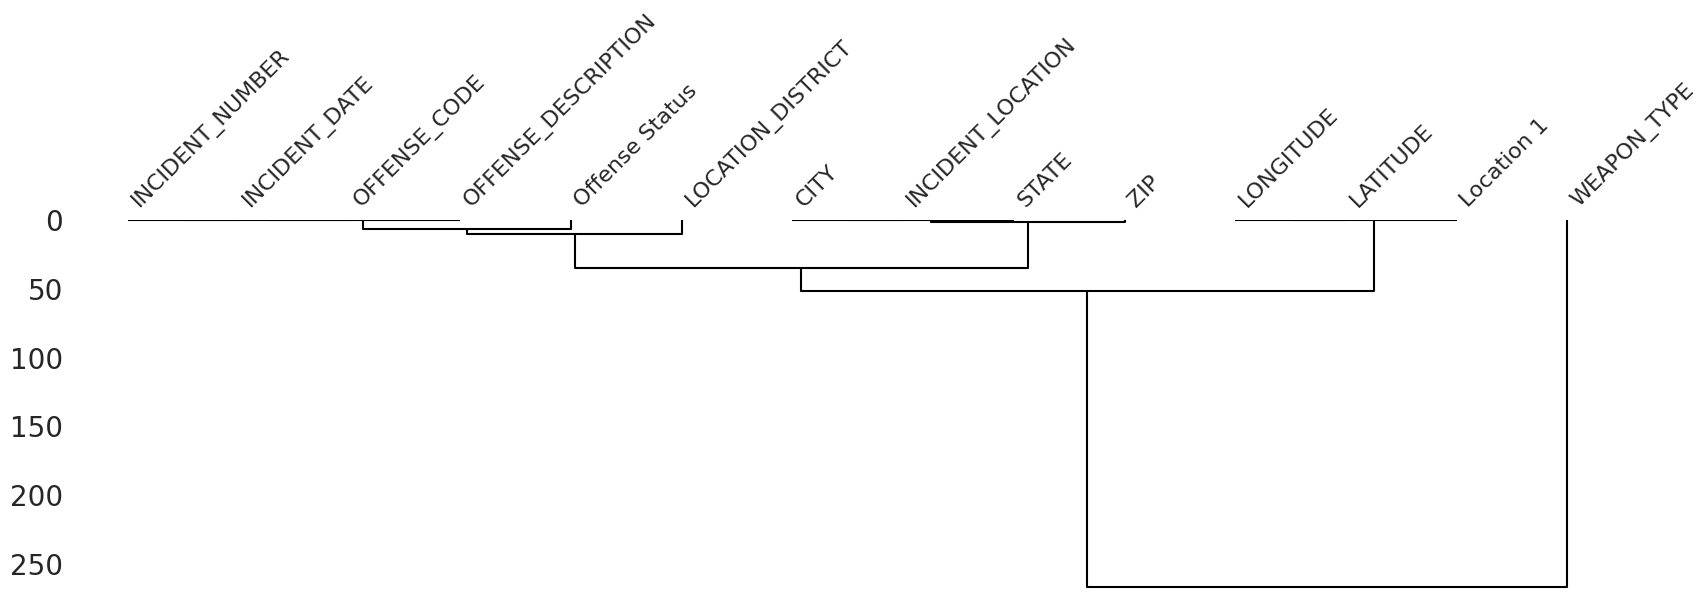

In [ ]:
msno.dendrogram(crimes_data,figsize=(20,5))

In [ ]:
crimes_data.dropna(subset=['LATITUDE'],inplace=True)
crimes_data.reset_index(drop=True,inplace=True)
crimes_data

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0      03/09/2021 06:18:00 PM     2021-023750               91.0          13A   
1      11/26/2019 05:39:00 PM     2019-147215               91.0          23F   
2      11/17/2021 08:16:00 AM     2021-141171               83.0          220   
3      05/25/2022 02:28:00 PM     2022-060493               70.0          23H   
4      01/10/2023 04:55:00 PM     2023-004291               92.0          23F   
...                       ...             ...                ...          ...   
89066  10/26/2017 07:20:00 AM     2017-134915               50.0          220   
89067  08/24/2020 12:37:00 PM     2020-097500               60.0          23F   
89068  08/08/2022 05:17:00 PM     2022-093844               62.0          23G   
89069  01/20/2020 06:45:00 AM     2020-008081               71.0          220   
89070  01/15/2021 10:30:00 AM     2021-003578               62.0          220   

                OFFENSE_DESCRIPTION    WEAPON_TYPE       INCIDENT_LOCATION  \
0                AGGRAVATED ASSAULT  MOTOR VEHICLE    10010  INTERSTATE 30   
1          THEFT FROM MOTOR VEHICLE            NaN        8112 DEPRIEST RD   
2                      BURGLARY/B&E            NaN           9101 AUXOR RD   
3                 ALL OTHER LARCENY            NaN       14119 LONGTREE DR   
4          THEFT FROM MOTOR VEHICLE            NaN     12103 INTERSTATE 30   
...                             ...            ...                     ...   
89066                  BURGLARY/B&E            NaN          1100 N POLK ST   
89067      THEFT FROM MOTOR VEHICLE            NaN  7600  REBSAMEN PARK RD   
89068  THEFT OF MOTOR VEHICLE PARTS            NaN       901 TOWNE OAKS DR   
89069                  BURGLARY/B&E            NaN        13500 CHENAL PKY   
89070                  BURGLARY/B&E            NaN     501  NAPA VALLEY DR   

              CITY STATE      ZIP   LATITUDE  LONGITUDE  \
0      LITTLE ROCK    AR  72209.0  34.672212 -92.377673   
1      LITTLE ROCK    AR  72103.0  34.651846 -92.367600   
2      LITTLE ROCK    AR  72209.0  34.666645 -92.314640   
3      LITTLE ROCK    AR  72205.0  34.479168 -92.242897   
4      LITTLE ROCK    AR  72209.0  34.671726 -92.358899   
...            ...   ...      ...        ...        ...   
89066  LITTLE ROCK    AR  72205.0  34.760986 -92.334457   
89067  LITTLE ROCK    AR  72207.0  34.790585 -92.358346   
89068  LITTLE ROCK    AR  72227.0  34.760671 -92.376974   
89069  LITTLE ROCK    AR  72211.0  34.755016 -92.421387   
89070  LITTLE ROCK    AR  72211.0  34.758669 -92.410398   

                    Location 1 Offense Status  
0      (34.672212, -92.377673)             OP  
1        (34.651846, -92.3676)             AR  
2       (34.666645, -92.31464)             EX  
3      (34.479168, -92.242897)             OP  
4      (34.671726, -92.358899)             OP  
...                        ...            ...  
89066  (34.760986, -92.334457)             AD  
89067  (34.790585, -92.358346)             OP  
89068  (34.760671, -92.376974)             OP  
89069  (34.755016, -92.421387)             AR  
89070  (34.758669, -92.410398)             AD  

[89071 rows x 14 columns]

In [ ]:
crimes_data.isnull().sum()

INCIDENT_DATE              0
INCIDENT_NUMBER            0
LOCATION_DISTRICT         86
OFFENSE_CODE               0
OFFENSE_DESCRIPTION        0
WEAPON_TYPE            69254
INCIDENT_LOCATION          0
CITY                       0
STATE                      0
ZIP                        0
LATITUDE                   0
LONGITUDE                  0
Location 1                 0
Offense Status            41
dtype: int64

In [ ]:
#crimes_data.drop('WEAPON_TYPE', inplace=True, axis=1)
crimes_data.WEAPON_TYPE = crimes_data.WEAPON_TYPE.fillna('NotAv')
crimes_data
crime_w_weapon = crimes_data['WEAPON_TYPE'] != 'NotAv'

crimes_data[crime_w_weapon]


INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0      03/09/2021 06:18:00 PM     2021-023750               91.0          13A   
5      05/24/2022 09:12:00 AM     2022-059994               80.0          13A   
7      07/08/2021 10:07:00 AM     2021-080082               80.0          120   
9      08/20/2022 12:03:00 AM     2022-098731               81.0          13A   
11     07/13/2021 08:30:00 AM     2021-082488               91.0          13A   
...                       ...             ...                ...          ...   
89022  01/28/2020 02:00:00 PM     2020-011103               70.0          120   
89025  06/20/2017 07:15:00 AM     2017-073798               50.0          13A   
89046  03/24/2017 09:44:00 PM     2017-032673               50.0          13A   
89051  07/20/2022 03:13:00 AM     2022-085463               60.0          13A   
89059  08/01/2019 12:34:00 PM     2019-095797               64.0          13A   

      OFFENSE_DESCRIPTION                           WEAPON_TYPE  \
0      AGGRAVATED ASSAULT                         MOTOR VEHICLE   
5      AGGRAVATED ASSAULT                               HANDGUN   
7                 ROBBERY                               HANDGUN   
9      AGGRAVATED ASSAULT                         MOTOR VEHICLE   
11     AGGRAVATED ASSAULT  PERSONAL WEAPONS (HANDS, FISTS, ETC)   
...                   ...                                   ...   
89022             ROBBERY  PERSONAL WEAPONS (HANDS, FISTS, ETC)   
89025  AGGRAVATED ASSAULT  PERSONAL WEAPONS (HANDS, FISTS, ETC)   
89046  AGGRAVATED ASSAULT  PERSONAL WEAPONS (HANDS, FISTS, ETC)   
89051  AGGRAVATED ASSAULT  PERSONAL WEAPONS (HANDS, FISTS, ETC)   
89059  AGGRAVATED ASSAULT                         OTHER FIREARM   

           INCIDENT_LOCATION         CITY STATE      ZIP   LATITUDE  \
0       10010  INTERSTATE 30  LITTLE ROCK    AR  72209.0  34.672212   
5             2600 W 65TH ST  LITTLE ROCK    AR  72209.0  34.690147   
7             1800 W 65TH ST  LITTLE ROCK    AR  72209.0  34.688231   
9      7515 GEYER SPRINGS RD  LITTLE ROCK    AR  72209.0  34.681459   
11           9001 JOHNSON RD  LITTLE ROCK    AR  72103.0  34.632183   
...                      ...          ...   ...      ...        ...   
89022      11525 CANTRELL RD  LITTLE ROCK    AR  72212.0  34.792759   
89025   425 N UNIVERSITY AVE  LITTLE ROCK    AR  72205.0  34.755695   
89046     3901 CEDAR HILL RD  LITTLE ROCK    AR  72202.0  34.759764   
89051         7 FAIRBROOK DR  LITTLE ROCK    AR  72205.0  34.753969   
89059          11214 MESA DR  LITTLE ROCK    AR  72211.0  34.757081   

       LONGITUDE               Location 1 Offense Status  
0     -92.377673  (34.672212, -92.377673)             OP  
5     -92.306854  (34.690147, -92.306854)             AC  
7     -92.296829  (34.688231, -92.296829)             IN  
9     -92.344489  (34.681459, -92.344489)             OP  
11    -92.386924  (34.632183, -92.386924)             OP  
...          ...                      ...            ...  
89022 -92.402832  (34.792759, -92.402832)             EX  
89025 -92.341003  (34.755695, -92.341003)             EX  
89046 -92.316761  (34.759764, -92.316761)             EX  
89051 -92.370193  (34.753969, -92.370193)             EX  
89059 -92.398322  (34.757081, -92.398322)             AC  

[19817 rows x 14 columns]

In [ ]:
crimes_data["WEAPON_TYPE"].unique()

array(['MOTOR VEHICLE', 'NotAv', 'HANDGUN',
       'PERSONAL WEAPONS (HANDS, FISTS, ETC)', 'FIREARM', 'RIFLE',
       'KNIFE/CUTTING INSTRUMENT', 'SHOTGUN', 'BLUNT OBJECT', 'OTHER',
       'UNKNOWN', 'FIRE/INCENDIARY DEVICE', 'OTHER FIREARM',
       'ASPHYXIATION', 'DRUGS/NARCOTICS', 'POISON', 'EXPLOSIVES', '1'],
      dtype=object)

In [ ]:
crimes_data.dropna(inplace=True)
crimes_data.reset_index(drop=True,inplace=True)

In [ ]:
crimes_data.isnull().sum()

INCIDENT_DATE          0
INCIDENT_NUMBER        0
LOCATION_DISTRICT      0
OFFENSE_CODE           0
OFFENSE_DESCRIPTION    0
WEAPON_TYPE            0
INCIDENT_LOCATION      0
CITY                   0
STATE                  0
ZIP                    0
LATITUDE               0
LONGITUDE              0
Location 1             0
Offense Status         0
dtype: int64

In [ ]:
crimes_data.INCIDENT_DATE = pd.to_datetime(crimes_data.INCIDENT_DATE)
crimes_data['day_of_week'] = crimes_data.INCIDENT_DATE.dt.day_name()
crimes_data['month'] = crimes_data.INCIDENT_DATE.dt.month_name()
crimes_data['time'] = crimes_data.INCIDENT_DATE.dt.hour
crimes_data['year'] = crimes_data.INCIDENT_DATE.dt.year

crimes_data

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0     2021-03-09 18:18:00     2021-023750               91.0          13A   
1     2019-11-26 17:39:00     2019-147215               91.0          23F   
2     2021-11-17 08:16:00     2021-141171               83.0          220   
3     2022-05-25 14:28:00     2022-060493               70.0          23H   
4     2023-01-10 16:55:00     2023-004291               92.0          23F   
...                   ...             ...                ...          ...   
88939 2017-10-26 07:20:00     2017-134915               50.0          220   
88940 2020-08-24 12:37:00     2020-097500               60.0          23F   
88941 2022-08-08 17:17:00     2022-093844               62.0          23G   
88942 2020-01-20 06:45:00     2020-008081               71.0          220   
88943 2021-01-15 10:30:00     2021-003578               62.0          220   

                OFFENSE_DESCRIPTION    WEAPON_TYPE       INCIDENT_LOCATION  \
0                AGGRAVATED ASSAULT  MOTOR VEHICLE    10010  INTERSTATE 30   
1          THEFT FROM MOTOR VEHICLE          NotAv        8112 DEPRIEST RD   
2                      BURGLARY/B&E          NotAv           9101 AUXOR RD   
3                 ALL OTHER LARCENY          NotAv       14119 LONGTREE DR   
4          THEFT FROM MOTOR VEHICLE          NotAv     12103 INTERSTATE 30   
...                             ...            ...                     ...   
88939                  BURGLARY/B&E          NotAv          1100 N POLK ST   
88940      THEFT FROM MOTOR VEHICLE          NotAv  7600  REBSAMEN PARK RD   
88941  THEFT OF MOTOR VEHICLE PARTS          NotAv       901 TOWNE OAKS DR   
88942                  BURGLARY/B&E          NotAv        13500 CHENAL PKY   
88943                  BURGLARY/B&E          NotAv     501  NAPA VALLEY DR   

              CITY STATE      ZIP   LATITUDE  LONGITUDE  \
0      LITTLE ROCK    AR  72209.0  34.672212 -92.377673   
1      LITTLE ROCK    AR  72103.0  34.651846 -92.367600   
2      LITTLE ROCK    AR  72209.0  34.666645 -92.314640   
3      LITTLE ROCK    AR  72205.0  34.479168 -92.242897   
4      LITTLE ROCK    AR  72209.0  34.671726 -92.358899   
...            ...   ...      ...        ...        ...   
88939  LITTLE ROCK    AR  72205.0  34.760986 -92.334457   
88940  LITTLE ROCK    AR  72207.0  34.790585 -92.358346   
88941  LITTLE ROCK    AR  72227.0  34.760671 -92.376974   
88942  LITTLE ROCK    AR  72211.0  34.755016 -92.421387   
88943  LITTLE ROCK    AR  72211.0  34.758669 -92.410398   

                    Location 1 Offense Status day_of_week     month  time  \
0      (34.672212, -92.377673)             OP     Tuesday     March    18   
1        (34.651846, -92.3676)             AR     Tuesday  November    17   
2       (34.666645, -92.31464)             EX   Wednesday  November     8   
3      (34.479168, -92.242897)             OP   Wednesday       May    14   
4      (34.671726, -92.358899)             OP     Tuesday   January    16   
...                        ...            ...         ...       ...   ...   
88939  (34.760986, -92.334457)             AD    Thursday   October     7   
88940  (34.790585, -92.358346)             OP      Monday    August    12   
88941  (34.760671, -92.376974)             OP      Monday    August    17   
88942  (34.755016, -92.421387)             AR      Monday   January     6   
88943  (34.758669, -92.410398)             AD      Friday   January    10   

       year  
0      2021  
1      2019  
2      2021  
3      2022  
4      2023  
...     ...  
88939  2017  
88940  2020  
88941  2022  
88942  2020  
88943  2021  

[88944 rows x 18 columns]

In [ ]:
#newData = crimes_data_2022.set_index('WEAPON_TYPE')
#newData

# **Work on this!!!**

Crime data by year:

In [ ]:
crimes_data_2021 = crimes_data[crimes_data.year == 2021]
crimes_data_2022 = crimes_data[crimes_data.year == 2022]
crimes_data_2020 = crimes_data[crimes_data.year == 2020]

crimes_data_2021.reset_index(drop=True,inplace=True)
crimes_data_2022.reset_index(drop=True,inplace=True)
crimes_data_2020.reset_index(drop=True,inplace=True)

crimes_data_2022

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0     2022-05-25 14:28:00     2022-060493               70.0          23H   
1     2022-05-24 09:12:00     2022-059994               80.0          13A   
2     2022-08-20 00:03:00     2022-098731               81.0          13A   
3     2022-11-04 18:55:00     2022-131493               92.0          23C   
4     2022-07-06 04:11:00     2022-079462               83.0          23H   
...                   ...             ...                ...          ...   
13184 2022-04-03 18:59:00     2022-037812               62.0          23H   
13185 2022-06-24 11:04:00     2022-073869               60.0          23H   
13186 2022-07-20 03:13:00     2022-085463               60.0          13A   
13187 2022-05-21 21:09:00     2022-059023               62.0          240   
13188 2022-08-08 17:17:00     2022-093844               62.0          23G   

                OFFENSE_DESCRIPTION                           WEAPON_TYPE  \
0                 ALL OTHER LARCENY                                 NotAv   
1                AGGRAVATED ASSAULT                               HANDGUN   
2                AGGRAVATED ASSAULT                         MOTOR VEHICLE   
3                       SHOPLIFTING                                 NotAv   
4                 ALL OTHER LARCENY                                 NotAv   
...                             ...                                   ...   
13184             ALL OTHER LARCENY                                 NotAv   
13185             ALL OTHER LARCENY                                 NotAv   
13186            AGGRAVATED ASSAULT  PERSONAL WEAPONS (HANDS, FISTS, ETC)   
13187           MOTOR VEHICLE THEFT                                 NotAv   
13188  THEFT OF MOTOR VEHICLE PARTS                                 NotAv   

           INCIDENT_LOCATION         CITY STATE      ZIP   LATITUDE  \
0          14119 LONGTREE DR  LITTLE ROCK    AR  72205.0  34.479168   
1             2600 W 65TH ST  LITTLE ROCK    AR  72209.0  34.690147   
2      7515 GEYER SPRINGS RD  LITTLE ROCK    AR  72209.0  34.681459   
3       11201  BASS PRO PKWY  LITTLE ROCK    AR  72210.0  34.661988   
4          6911 KNOLLWOOD RD  LITTLE ROCK    AR  72209.0  34.669503   
...                      ...          ...   ...      ...        ...   
13184        111 N BOWMAN RD  LITTLE ROCK    AR  72211.0  34.754965   
13185       4 NORTHBROOK CIR  LITTLE ROCK    AR  72205.0  34.756207   
13186         7 FAIRBROOK DR  LITTLE ROCK    AR  72205.0  34.753969   
13187   1420 BRECKENRIDGE DR  LITTLE ROCK    AR  72227.0  34.770121   
13188      901 TOWNE OAKS DR  LITTLE ROCK    AR  72227.0  34.760671   

       LONGITUDE               Location 1 Offense Status day_of_week  \
0     -92.242897  (34.479168, -92.242897)             OP   Wednesday   
1     -92.306854  (34.690147, -92.306854)             AC     Tuesday   
2     -92.344489  (34.681459, -92.344489)             OP    Saturday   
3     -92.407727  (34.661988, -92.407727)             OP      Friday   
4     -92.355032  (34.669503, -92.355032)             OP   Wednesday   
...          ...                      ...            ...         ...   
13184 -92.405847  (34.754965, -92.405847)             AD      Sunday   
13185 -92.370312  (34.756207, -92.370312)             OP      Friday   
13186 -92.370193  (34.753969, -92.370193)             EX   Wednesday   
13187 -92.388362  (34.770121, -92.388362)             AD    Saturday   
13188 -92.376974  (34.760671, -92.376974)             OP      Monday   

          month  time  year  
0           May    14  2022  
1           May     9  2022  
2        August     0  2022  
3      November    18  2022  
4          July     4  2022  
...         ...   ...   ...  
13184     April    18  2022  
13185      June    11  2022  
13186      July     3  2022  
13187       May    21  2022  
13188    August    17  2022  

[13189 rows x 18 columns]

# Assault data

In [ ]:
assaultData = crimes_data_2022['OFFENSE_DESCRIPTION'] ==  'AGGRAVATED ASSAULT'
crime_assault2022 = crimes_data_2022[assaultData]

assaultData2 = crimes_data_2021['OFFENSE_DESCRIPTION'] ==  'AGGRAVATED ASSAULT'
crime_assault2021 = crimes_data_2021[assaultData2]

assaultData3 = crimes_data_2020['OFFENSE_DESCRIPTION'] ==  'AGGRAVATED ASSAULT'
crime_assault2020 = crimes_data_2020[assaultData3]
#crime_assault2022

# Murder data

In [ ]:
murderData = crimes_data_2022['OFFENSE_DESCRIPTION'] ==  'MURDER & NONNEGLIGENT MANSLAUGHTER'
crime_murder2022 = crimes_data_2022[murderData]

murderData2 = crimes_data_2021['OFFENSE_DESCRIPTION'] ==  'MURDER & NONNEGLIGENT MANSLAUGHTER'
crime_murder2021 = crimes_data_2021[murderData2]

murderData3 = crimes_data_2020['OFFENSE_DESCRIPTION'] ==  'MURDER & NONNEGLIGENT MANSLAUGHTER'
crime_murder2020 = crimes_data_2020[murderData3]

#crime_murder2022

# Theft without Weapon

In [ ]:
crime_wo_weapon3 = crimes_data_2022['WEAPON_TYPE'] == 'NotAv'
cr_wo_Weapon = crimes_data_2022[crime_wo_weapon3]

crime_wo_weapon4 = crimes_data_2021['WEAPON_TYPE'] == 'NotAv'
cr_wo_Weapon2 = crimes_data_2021[crime_wo_weapon4]

crime_wo_weapon5 = crimes_data_2020['WEAPON_TYPE'] == 'NotAv'
cr_wo_Weapon3 = crimes_data_2020[crime_wo_weapon5]
#cr_wo_Weapon

In [ ]:
theft_wo_weapon = cr_wo_Weapon['OFFENSE_DESCRIPTION'] != 'AGGRAVATED ASSAULT'
tft_wo_Weapon = cr_wo_Weapon[theft_wo_weapon]

theft_wo_weapon2 = cr_wo_Weapon2['OFFENSE_DESCRIPTION'] != 'AGGRAVATED ASSAULT'
tft_wo_Weapon2 = cr_wo_Weapon2[theft_wo_weapon2]

theft_wo_weapon3 = cr_wo_Weapon3['OFFENSE_DESCRIPTION'] != 'AGGRAVATED ASSAULT'
tft_wo_Weapon3 = cr_wo_Weapon3[theft_wo_weapon3]
#tft_wo_Weapon

Table for Theft Without Weapon

In [ ]:
theft_wo_weapon4 = tft_wo_Weapon['OFFENSE_DESCRIPTION'] != 'MURDER & NONNEGLIGENT MANSLAUGHTER'
tft_wo_Weapon4 = tft_wo_Weapon[theft_wo_weapon4]
#tft_wo_Weapon4

theft_wo_weapon5 = tft_wo_Weapon2['OFFENSE_DESCRIPTION'] != 'MURDER & NONNEGLIGENT MANSLAUGHTER'
tft_wo_Weapon5 = tft_wo_Weapon2[theft_wo_weapon5]
#tft_wo_Weapon5

theft_wo_weapon6 = tft_wo_Weapon3['OFFENSE_DESCRIPTION'] != 'MURDER & NONNEGLIGENT MANSLAUGHTER'
tft_wo_Weapon6 = tft_wo_Weapon3[theft_wo_weapon6]
#tft_wo_Weapon6

# Table for Theft with Weapon

In [ ]:

'''
crime_w_weapon2 = crimes_data_2021[['WEAPON_TYPE']] !=  ('PERSONAL WEAPONS (HANDS, FISTS, ETC)', 'NotAv') #and
crime_w_weapon2 = crimes_data_2021['WEAPON_TYPE']
for i in range(len(crime_w_weapon2)):
  if crime_w_weapon2[i] != 'PERSONAL WEAPONS (HANDS, FISTS, ETC)':
    if crime_w_weapon2[i] != 'NotAv':
      print (crimes_data_2021.iloc)
'''


"\ncrime_w_weapon2 = crimes_data_2021[['WEAPON_TYPE']] !=  ('PERSONAL WEAPONS (HANDS, FISTS, ETC)', 'NotAv') #and\ncrime_w_weapon2 = crimes_data_2021['WEAPON_TYPE']\nfor i in range(len(crime_w_weapon2)):\n  if crime_w_weapon2[i] != 'PERSONAL WEAPONS (HANDS, FISTS, ETC)':\n    if crime_w_weapon2[i] != 'NotAv':\n      print (crimes_data_2021.iloc) \n"

In [ ]:
crime_w_weapon = crimes_data_2022['WEAPON_TYPE'] != 'NotAv'
cr_w_Weapon = crimes_data_2022[crime_w_weapon]


crime_w_weapon2 = crimes_data_2021['WEAPON_TYPE'] !=  'NotAv'
cr_w_Weapon2 = crimes_data_2021[crime_w_weapon2]

crime_w_weapon3 = crimes_data_2020['WEAPON_TYPE'] !=  'NotAv'
cr_w_Weapon3 = crimes_data_2020[crime_w_weapon3]

#cr_w_Weapon

In [ ]:
theft_w_weapon = cr_w_Weapon['OFFENSE_DESCRIPTION'] != 'AGGRAVATED ASSAULT'
tft_w_Weapon = cr_w_Weapon[theft_w_weapon]

theft_w_weapon3 = cr_w_Weapon2['OFFENSE_DESCRIPTION'] != 'AGGRAVATED ASSAULT'
tft_w_Weapon3 = cr_w_Weapon2[theft_w_weapon3]

theft_w_weapon5 = cr_w_Weapon3['OFFENSE_DESCRIPTION'] != 'AGGRAVATED ASSAULT'
tft_w_Weapon5 = cr_w_Weapon3[theft_w_weapon5]
#tft_w_Weapon

Table for theft with weapon:

In [ ]:
theft_w_weapon2 = tft_w_Weapon['OFFENSE_DESCRIPTION'] != 'MURDER & NONNEGLIGENT MANSLAUGHTER'
tft_w_Weapon2 = tft_w_Weapon[theft_w_weapon2]

theft_w_weapon4 = tft_w_Weapon3['OFFENSE_DESCRIPTION'] != 'MURDER & NONNEGLIGENT MANSLAUGHTER'
tft_w_Weapon4 = tft_w_Weapon3[theft_w_weapon4]

theft_w_weapon6 = tft_w_Weapon5['OFFENSE_DESCRIPTION'] != 'MURDER & NONNEGLIGENT MANSLAUGHTER'
tft_w_Weapon6 = tft_w_Weapon5[theft_w_weapon6]
#tft_w_Weapon2

# **Adding the crime_type column column to all the separated crime sections:**

In [ ]:
'''
List of Tables:

tft_wo_Weapon2
tft_w_Weapon2
crime_murder2022
crime_assault2022

'''

'\nList of Tables:\n\ntft_wo_Weapon2\ntft_w_Weapon2\ncrime_murder2022\ncrime_assault2022\n\n'

In [ ]:
tft_wo_Weapon4['crime_type'] = 'THEFT W/O WEAPON'
tft_w_Weapon2['crime_type'] = 'THEFT W WEAPON'
crime_murder2022['crime_type'] = 'MURDER & NONNEGLIGENT MANSLAUGHTER'
crime_assault2022['crime_type'] = 'AGGRAVATED ASSAULT'

tft_wo_Weapon5['crime_type'] = 'THEFT W/O WEAPON'
tft_w_Weapon4['crime_type'] = 'THEFT W WEAPON'
crime_murder2021['crime_type'] = 'MURDER & NONNEGLIGENT MANSLAUGHTER'
crime_assault2021['crime_type'] = 'AGGRAVATED ASSAULT'

tft_wo_Weapon6['crime_type'] = 'THEFT W/O WEAPON'
tft_w_Weapon6['crime_type'] = 'THEFT W WEAPON'
crime_murder2020['crime_type'] = 'MURDER & NONNEGLIGENT MANSLAUGHTER'
crime_assault2020['crime_type'] = 'AGGRAVATED ASSAULT'

<ipython-input-134-bee18964961c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tft_w_Weapon2['crime_type'] = 'THEFT W WEAPON'
<ipython-input-134-bee18964961c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_murder2022['crime_type'] = 'MURDER & NONNEGLIGENT MANSLAUGHTER'
<ipython-input-134-bee18964961c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [ ]:
tft_wo_Weapon4.head()

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0 2022-05-25 14:28:00     2022-060493               70.0          23H   
3 2022-11-04 18:55:00     2022-131493               92.0          23C   
4 2022-07-06 04:11:00     2022-079462               83.0          23H   
5 2022-02-21 07:44:00     2022-020837               91.0          220   
7 2022-01-16 14:30:00     2022-006041               80.0          240   

   OFFENSE_DESCRIPTION WEAPON_TYPE      INCIDENT_LOCATION         CITY STATE  \
0    ALL OTHER LARCENY       NotAv      14119 LONGTREE DR  LITTLE ROCK    AR   
3          SHOPLIFTING       NotAv   11201  BASS PRO PKWY  LITTLE ROCK    AR   
4    ALL OTHER LARCENY       NotAv      6911 KNOLLWOOD RD  LITTLE ROCK    AR   
5         BURGLARY/B&E       NotAv       8218 BASELINE RD  LITTLE ROCK    AR   
7  MOTOR VEHICLE THEFT       NotAv  6425 S UNIVERSITY AVE  LITTLE ROCK    AR   

       ZIP   LATITUDE  LONGITUDE               Location 1 Offense Status  \
0  72205.0  34.479168 -92.242897  (34.479168, -92.242897)             OP   
3  72210.0  34.661988 -92.407727  (34.661988, -92.407727)             OP   
4  72209.0  34.669503 -92.355032  (34.669503, -92.355032)             OP   
5  72209.0  34.670430 -92.368801   (34.67043, -92.368801)             OP   
7  72209.0  34.643733 -92.362273  (34.643733, -92.362273)             AR   

  day_of_week     month  time  year        crime_type  
0   Wednesday       May    14  2022  THEFT W/O WEAPON  
3      Friday  November    18  2022  THEFT W/O WEAPON  
4   Wednesday      July     4  2022  THEFT W/O WEAPON  
5      Monday  February     7  2022  THEFT W/O WEAPON  
7      Sunday   January    14  2022  THEFT W/O WEAPON

# **Combining tables into one and resetting index:**

In [ ]:
fullData = [tft_wo_Weapon4, tft_w_Weapon2, crime_murder2022, crime_assault2022]
full_Crime_Data_2022 = pd.concat(fullData)

fullData2 = [tft_wo_Weapon5, tft_w_Weapon4, crime_murder2021, crime_assault2021]
full_Crime_Data_2021 = pd.concat(fullData2)

fullData3 = [tft_wo_Weapon6, tft_w_Weapon6, crime_murder2020, crime_assault2020]
full_Crime_Data_2020 = pd.concat(fullData3)

In [ ]:
full_Crime_Data_2022.reset_index(drop=True,inplace=True)
full_Crime_Data_2022.head()

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0 2022-05-25 14:28:00     2022-060493               70.0          23H   
1 2022-11-04 18:55:00     2022-131493               92.0          23C   
2 2022-07-06 04:11:00     2022-079462               83.0          23H   
3 2022-02-21 07:44:00     2022-020837               91.0          220   
4 2022-01-16 14:30:00     2022-006041               80.0          240   

   OFFENSE_DESCRIPTION WEAPON_TYPE      INCIDENT_LOCATION         CITY STATE  \
0    ALL OTHER LARCENY       NotAv      14119 LONGTREE DR  LITTLE ROCK    AR   
1          SHOPLIFTING       NotAv   11201  BASS PRO PKWY  LITTLE ROCK    AR   
2    ALL OTHER LARCENY       NotAv      6911 KNOLLWOOD RD  LITTLE ROCK    AR   
3         BURGLARY/B&E       NotAv       8218 BASELINE RD  LITTLE ROCK    AR   
4  MOTOR VEHICLE THEFT       NotAv  6425 S UNIVERSITY AVE  LITTLE ROCK    AR   

       ZIP   LATITUDE  LONGITUDE               Location 1 Offense Status  \
0  72205.0  34.479168 -92.242897  (34.479168, -92.242897)             OP   
1  72210.0  34.661988 -92.407727  (34.661988, -92.407727)             OP   
2  72209.0  34.669503 -92.355032  (34.669503, -92.355032)             OP   
3  72209.0  34.670430 -92.368801   (34.67043, -92.368801)             OP   
4  72209.0  34.643733 -92.362273  (34.643733, -92.362273)             AR   

  day_of_week     month  time  year        crime_type  
0   Wednesday       May    14  2022  THEFT W/O WEAPON  
1      Friday  November    18  2022  THEFT W/O WEAPON  
2   Wednesday      July     4  2022  THEFT W/O WEAPON  
3      Monday  February     7  2022  THEFT W/O WEAPON  
4      Sunday   January    14  2022  THEFT W/O WEAPON

In [ ]:
full_Crime_Data_2021.reset_index(drop=True,inplace=True)
full_Crime_Data_2021.head()

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0 2021-11-17 08:16:00     2021-141171               83.0          220   
1 2021-03-17 14:12:00     2021-027169               92.0          23D   
2 2021-03-22 13:02:00     2021-029421               83.0          23H   
3 2021-12-05 16:24:00     2021-148711               91.0          23H   
4 2021-07-23 11:54:00     2021-087241               83.0          23H   

   OFFENSE_DESCRIPTION WEAPON_TYPE INCIDENT_LOCATION         CITY STATE  \
0         BURGLARY/B&E       NotAv     9101 AUXOR RD  LITTLE ROCK    AR   
1  THEFT FROM BUILDING       NotAv  9 APPLE TREE CIR  LITTLE ROCK    AR   
2    ALL OTHER LARCENY       NotAv  3616 ARAPAHO TRL  LITTLE ROCK    AR   
3    ALL OTHER LARCENY       NotAv    9712 CHICOT RD  LITTLE ROCK    AR   
4    ALL OTHER LARCENY       NotAv  7304 YORKWOOD DR  LITTLE ROCK    AR   

       ZIP   LATITUDE  LONGITUDE               Location 1 Offense Status  \
0  72209.0  34.666645 -92.314640   (34.666645, -92.31464)             EX   
1  72209.0  34.465925 -92.243967  (34.465925, -92.243967)             OP   
2  72209.0  34.661181 -92.320133  (34.661181, -92.320133)             RE   
3  72209.0  34.661615 -92.363407  (34.661615, -92.363407)             OP   
4  72209.0  34.652059 -92.360461  (34.652059, -92.360461)             OP   

  day_of_week     month  time  year        crime_type  
0   Wednesday  November     8  2021  THEFT W/O WEAPON  
1   Wednesday     March    14  2021  THEFT W/O WEAPON  
2      Monday     March    13  2021  THEFT W/O WEAPON  
3      Sunday  December    16  2021  THEFT W/O WEAPON  
4      Friday      July    11  2021  THEFT W/O WEAPON

In [ ]:
full_Crime_Data_2020.reset_index(drop=True,inplace=True)
full_Crime_Data_2020.head()

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0 2020-07-07 18:52:00     2020-075911               93.0          23C   
1 2020-08-14 14:37:00     2020-092890               81.0          23F   
2 2020-10-24 10:37:00     2020-124686               93.0          23C   
3 2020-05-11 10:00:00     2020-058250               90.0          220   
4 2020-12-12 17:46:00     2020-145224               91.0          23C   

        OFFENSE_DESCRIPTION WEAPON_TYPE          INCIDENT_LOCATION  \
0               SHOPLIFTING       NotAv       10720  BASS PRO PKWY   
1  THEFT FROM MOTOR VEHICLE       NotAv        8212  FRENCHMANS LN   
2               SHOPLIFTING       NotAv       11201  BASS PRO PKWY   
3              BURGLARY/B&E       NotAv              7316 GRACE DR   
4               SHOPLIFTING       NotAv  10215  MABELVALE PLAZA DR   

          CITY STATE      ZIP   LATITUDE  LONGITUDE               Location 1  \
0  LITTLE ROCK    AR  72209.0  34.657543 -92.410366  (34.657543, -92.410366)   
1  LITTLE ROCK    AR  72209.0  34.676643 -92.346644  (34.676643, -92.346644)   
2  LITTLE ROCK    AR  72210.0  34.657543 -92.410366  (34.657543, -92.410366)   
3  LITTLE ROCK    AR  72209.0  34.688355 -92.358070   (34.688355, -92.35807)   
4  LITTLE ROCK    AR  72209.0  34.666934 -92.379056  (34.666934, -92.379056)   

  Offense Status day_of_week     month  time  year        crime_type  
0             OP     Tuesday      July    18  2020  THEFT W/O WEAPON  
1             OP      Friday    August    14  2020  THEFT W/O WEAPON  
2             OP    Saturday   October    10  2020  THEFT W/O WEAPON  
3             OP      Monday       May    10  2020  THEFT W/O WEAPON  
4             OP    Saturday  December    17  2020  THEFT W/O WEAPON

# Helpful code to be used/not used:

In [ ]:
full_Crime_Data_2022["OFFENSE_DESCRIPTION"].unique()
#Only Violent & Property Crimes

array(['ALL OTHER LARCENY', 'SHOPLIFTING', 'BURGLARY/B&E',
       'MOTOR VEHICLE THEFT', 'THEFT FROM MOTOR VEHICLE',
       'THEFT FROM BUILDING', 'THEFT OF MOTOR VEHICLE PARTS', 'ROBBERY',
       'THEFT FROM COIN-OPERATED MACHINE', 'POCKET-PICKING',
       'PURSE-SNATCHING', 'MURDER & NONNEGLIGENT MANSLAUGHTER',
       'AGGRAVATED ASSAULT'], dtype=object)

In [ ]:
full_Crime_Data_2022["crime_type"].unique()

array(['THEFT W/O WEAPON', 'THEFT W WEAPON',
       'MURDER & NONNEGLIGENT MANSLAUGHTER', 'AGGRAVATED ASSAULT'],
      dtype=object)

In [ ]:
'''
primary_type_map = {
    ('BURGLARY/B&E','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'T,
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'
}


primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values

crimes_data['OFFENSE_DESCRIPTION'] = crimes_data.primary_type.map(primary_type_mapping)
'''

"\nprimary_type_map = {\n    ('BURGLARY/B&E','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',\n    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'T,\n    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',\n    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',\n    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',\n    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',\n    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',\n    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'\n}\n\n\nprimary_type_mapping = {}\nfor keys, values in primary_type_map.items():\n    for key in keys:\n        primary_type_mapping[key] = values\n\ncrimes_data['OFFENSE_DESCRIPTION'] = cri

# **Vizualizing 2022 data:**

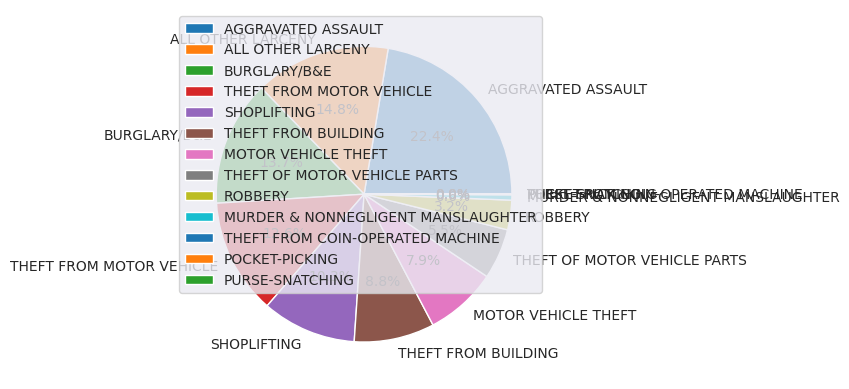

In [ ]:
crimes_data_primary_type_pie = plt.pie(full_Crime_Data_2022.OFFENSE_DESCRIPTION.value_counts(),labels=full_Crime_Data_2022.OFFENSE_DESCRIPTION.value_counts().index,autopct='%1.1f%%',radius=1)
plt.legend(loc = 'best')

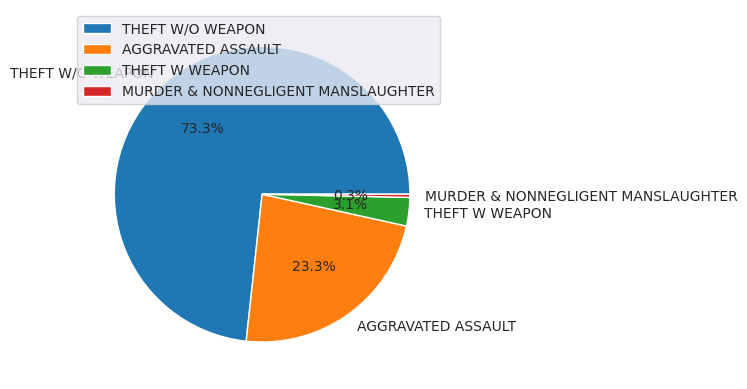

In [ ]:
full_Crime_Data_2020_pie = plt.pie(full_Crime_Data_2020.crime_type.value_counts(),labels=full_Crime_Data_2020.crime_type.value_counts().index,autopct='%1.1f%%',radius=1)
plt.legend(loc = 'best')

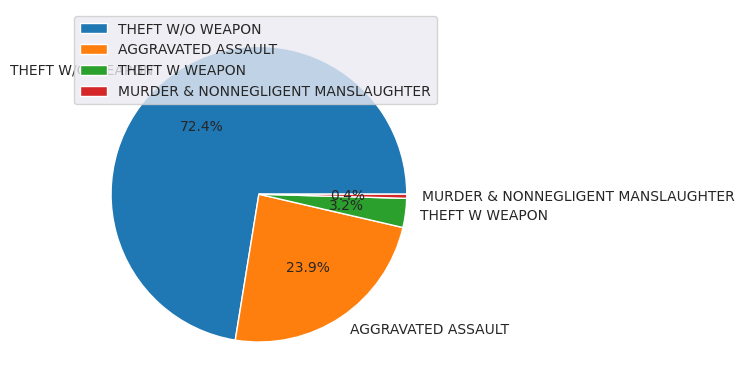

In [ ]:
full_Crime_Data_2021_pie = plt.pie(full_Crime_Data_2021.crime_type.value_counts(),labels=full_Crime_Data_2021.crime_type.value_counts().index,autopct='%1.1f%%',radius=1)
plt.legend(loc = 'best')

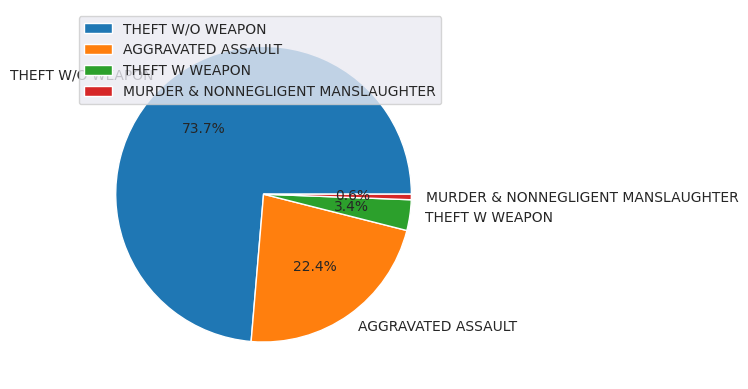

In [ ]:
full_Crime_Data_2022_pie = plt.pie(full_Crime_Data_2022.crime_type.value_counts(),labels=full_Crime_Data_2022.crime_type.value_counts().index,autopct='%1.1f%%',radius=1)
plt.legend(loc = 'best')

In [ ]:
full_Crime_Data_2022["CITY"].unique()

array(['LITTLE ROCK'], dtype=object)

**Graph:**

Text(0.5, 1.0, 'Crimes by District')

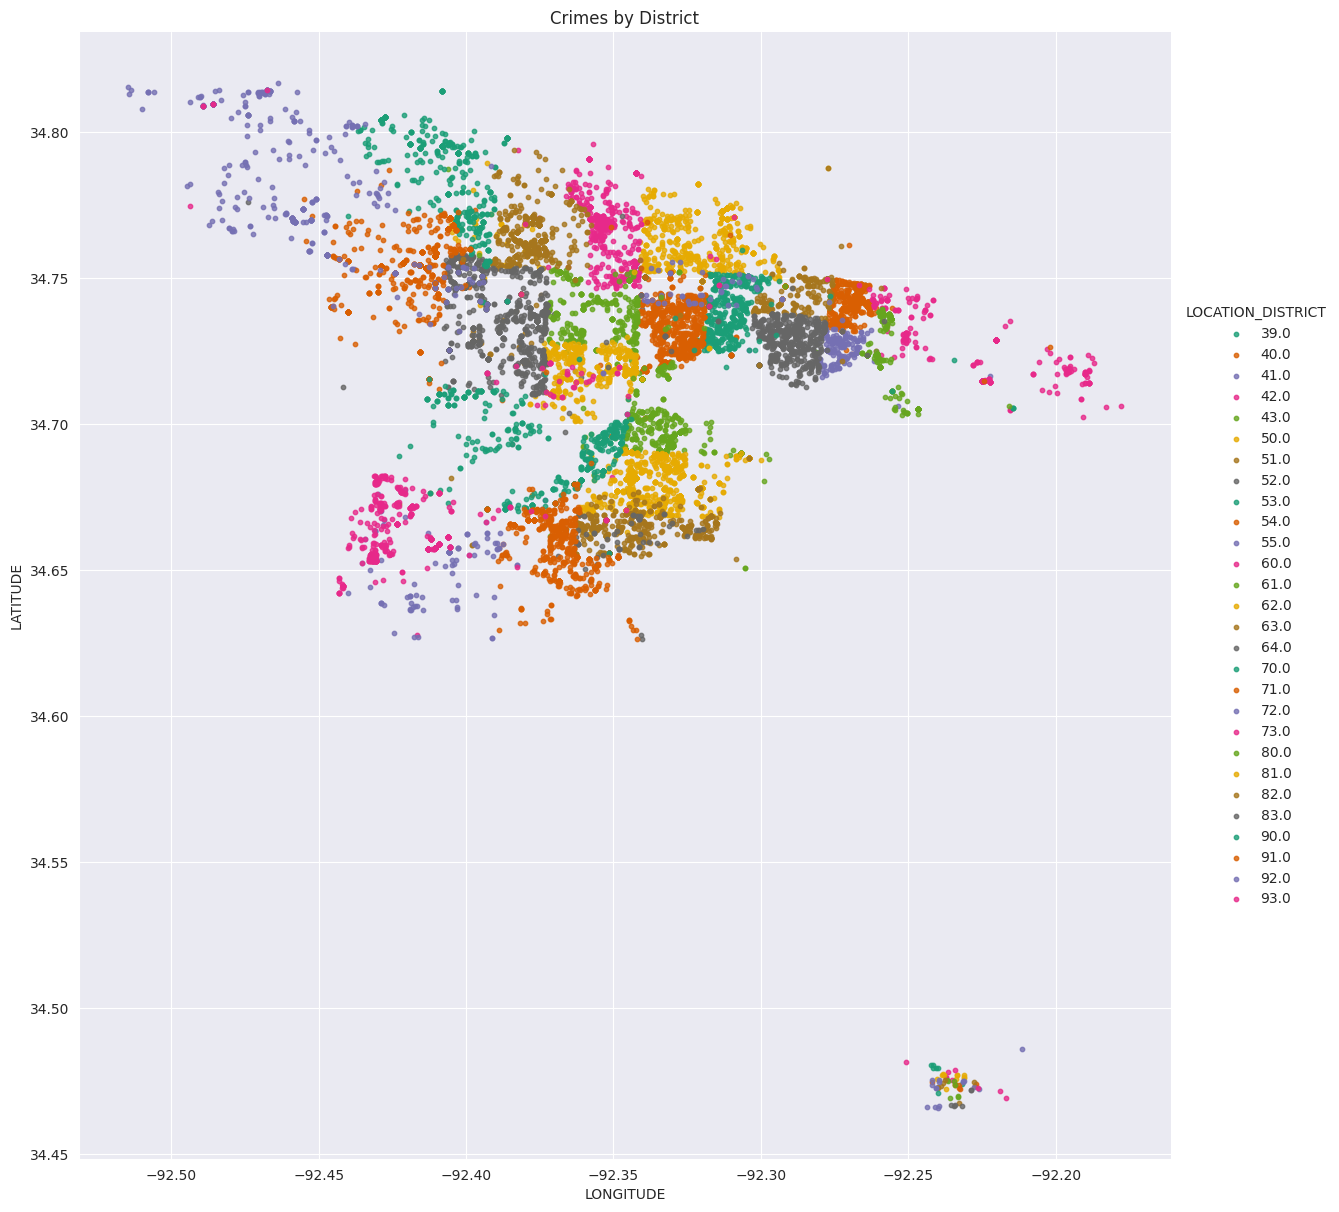

In [ ]:
new_crimes_data = full_Crime_Data_2020.loc[(full_Crime_Data_2020['LATITUDE']!=0)]
sns.lmplot(x = 'LONGITUDE',
           y = 'LATITUDE',
           data=new_crimes_data[:],
           fit_reg=False,
           hue="LOCATION_DISTRICT",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by District")

Text(0.5, 1.0, 'Crimes by District')

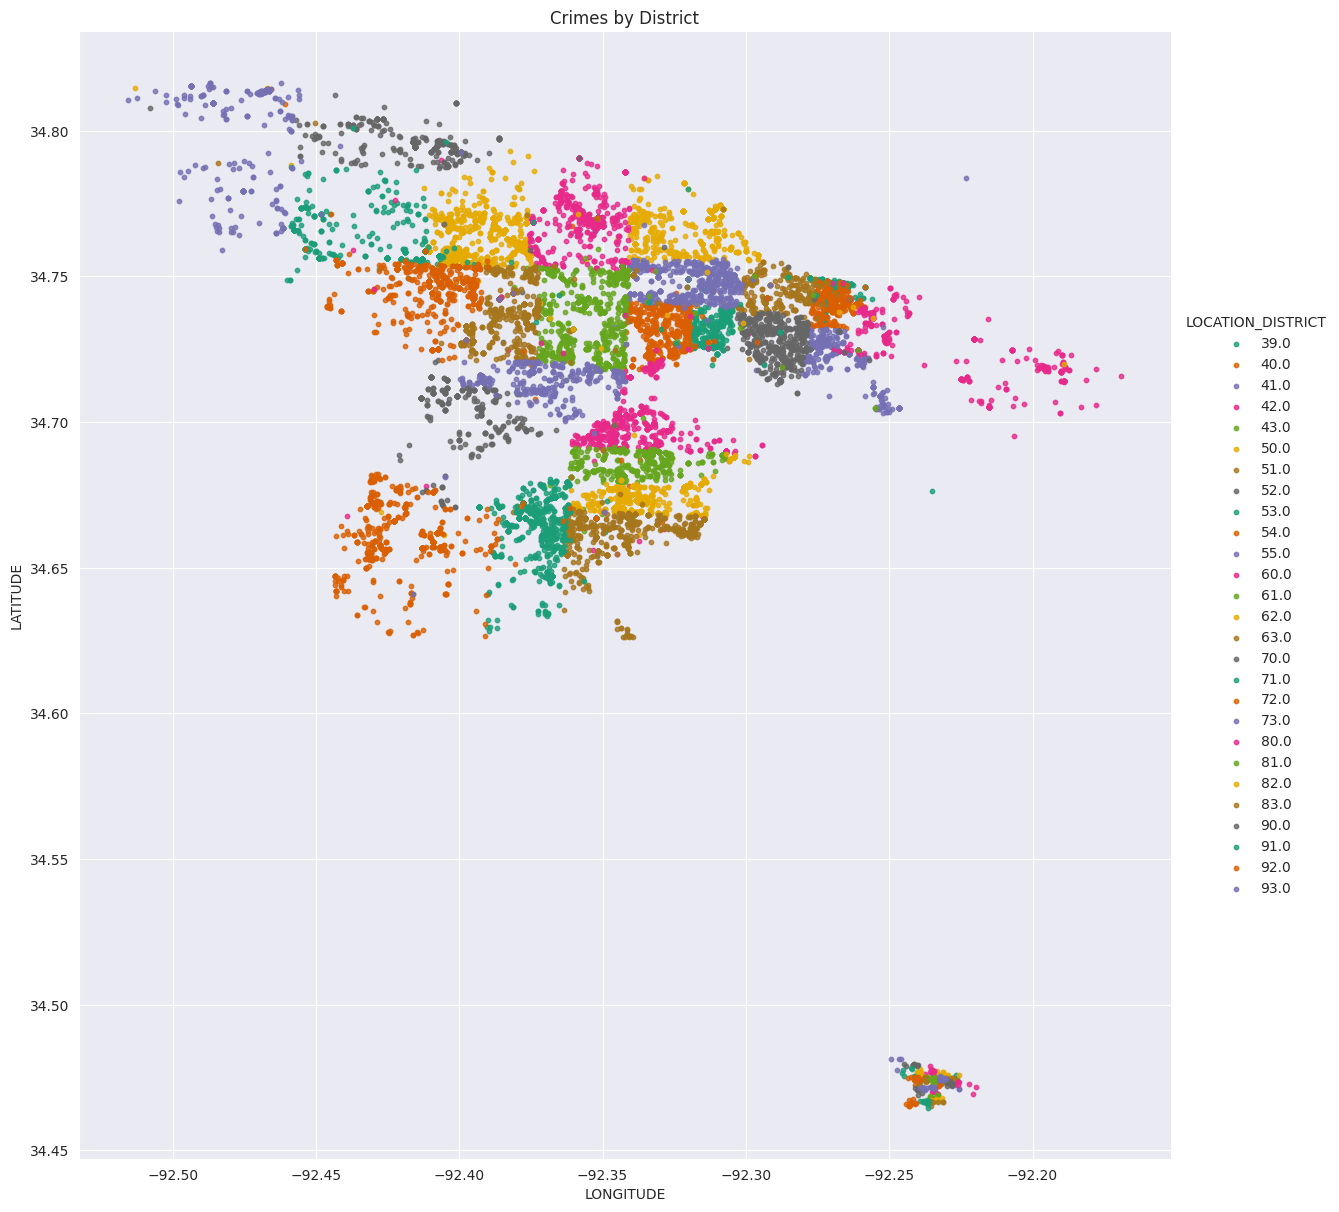

In [ ]:
new_crimes_data = full_Crime_Data_2021.loc[(full_Crime_Data_2021['LATITUDE']!=0)]
sns.lmplot(x = 'LONGITUDE',
           y = 'LATITUDE',
           data=new_crimes_data[:],
           fit_reg=False,
           hue="LOCATION_DISTRICT",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by District")

Text(0.5, 1.0, 'Crimes by District')

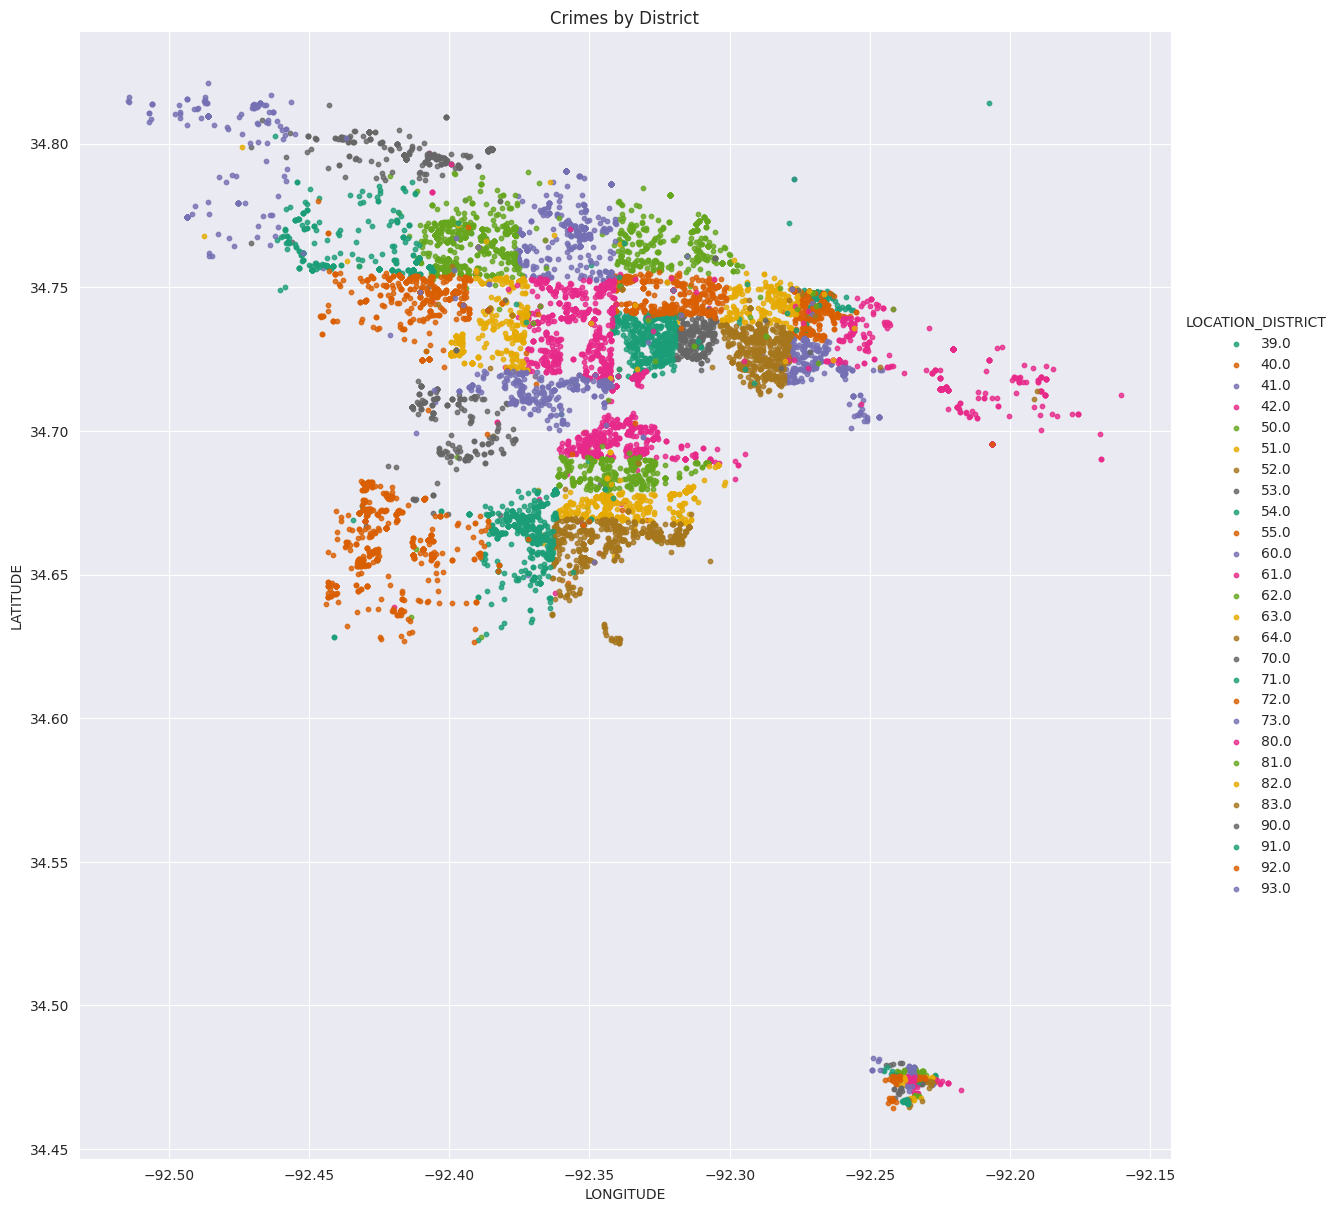

In [ ]:
new_crimes_data = full_Crime_Data_2022.loc[(full_Crime_Data_2022['LATITUDE']!=0)]
sns.lmplot(x = 'LONGITUDE',
           y = 'LATITUDE',
           data=new_crimes_data[:],
           fit_reg=False,
           hue="LOCATION_DISTRICT",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by District")

# **Combined Data:**

In [ ]:
datafull = [full_Crime_Data_2020, full_Crime_Data_2021, full_Crime_Data_2022]
full_Crime_Data_012 = pd.concat(datafull)
full_Crime_Data_012.head()

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0 2020-07-07 18:52:00     2020-075911               93.0          23C   
1 2020-08-14 14:37:00     2020-092890               81.0          23F   
2 2020-10-24 10:37:00     2020-124686               93.0          23C   
3 2020-05-11 10:00:00     2020-058250               90.0          220   
4 2020-12-12 17:46:00     2020-145224               91.0          23C   

        OFFENSE_DESCRIPTION WEAPON_TYPE          INCIDENT_LOCATION  \
0               SHOPLIFTING       NotAv       10720  BASS PRO PKWY   
1  THEFT FROM MOTOR VEHICLE       NotAv        8212  FRENCHMANS LN   
2               SHOPLIFTING       NotAv       11201  BASS PRO PKWY   
3              BURGLARY/B&E       NotAv              7316 GRACE DR   
4               SHOPLIFTING       NotAv  10215  MABELVALE PLAZA DR   

          CITY STATE      ZIP   LATITUDE  LONGITUDE               Location 1  \
0  LITTLE ROCK    AR  72209.0  34.657543 -92.410366  (34.657543, -92.410366)   
1  LITTLE ROCK    AR  72209.0  34.676643 -92.346644  (34.676643, -92.346644)   
2  LITTLE ROCK    AR  72210.0  34.657543 -92.410366  (34.657543, -92.410366)   
3  LITTLE ROCK    AR  72209.0  34.688355 -92.358070   (34.688355, -92.35807)   
4  LITTLE ROCK    AR  72209.0  34.666934 -92.379056  (34.666934, -92.379056)   

  Offense Status day_of_week     month  time  year        crime_type  
0             OP     Tuesday      July    18  2020  THEFT W/O WEAPON  
1             OP      Friday    August    14  2020  THEFT W/O WEAPON  
2             OP    Saturday   October    10  2020  THEFT W/O WEAPON  
3             OP      Monday       May    10  2020  THEFT W/O WEAPON  
4             OP    Saturday  December    17  2020  THEFT W/O WEAPON

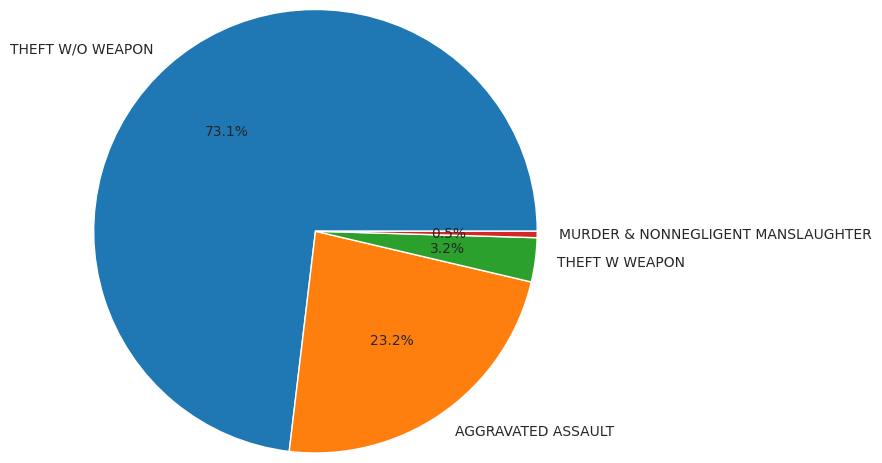

In [ ]:
full_Crime_Data_012_pie = plt.pie(full_Crime_Data_012.crime_type.value_counts(),labels=full_Crime_Data_012.crime_type.value_counts().index,autopct='%1.1f%%',radius=1.5)
#plt.legend(loc = 'best')

Text(0.5, 1.0, 'Crimes by District')

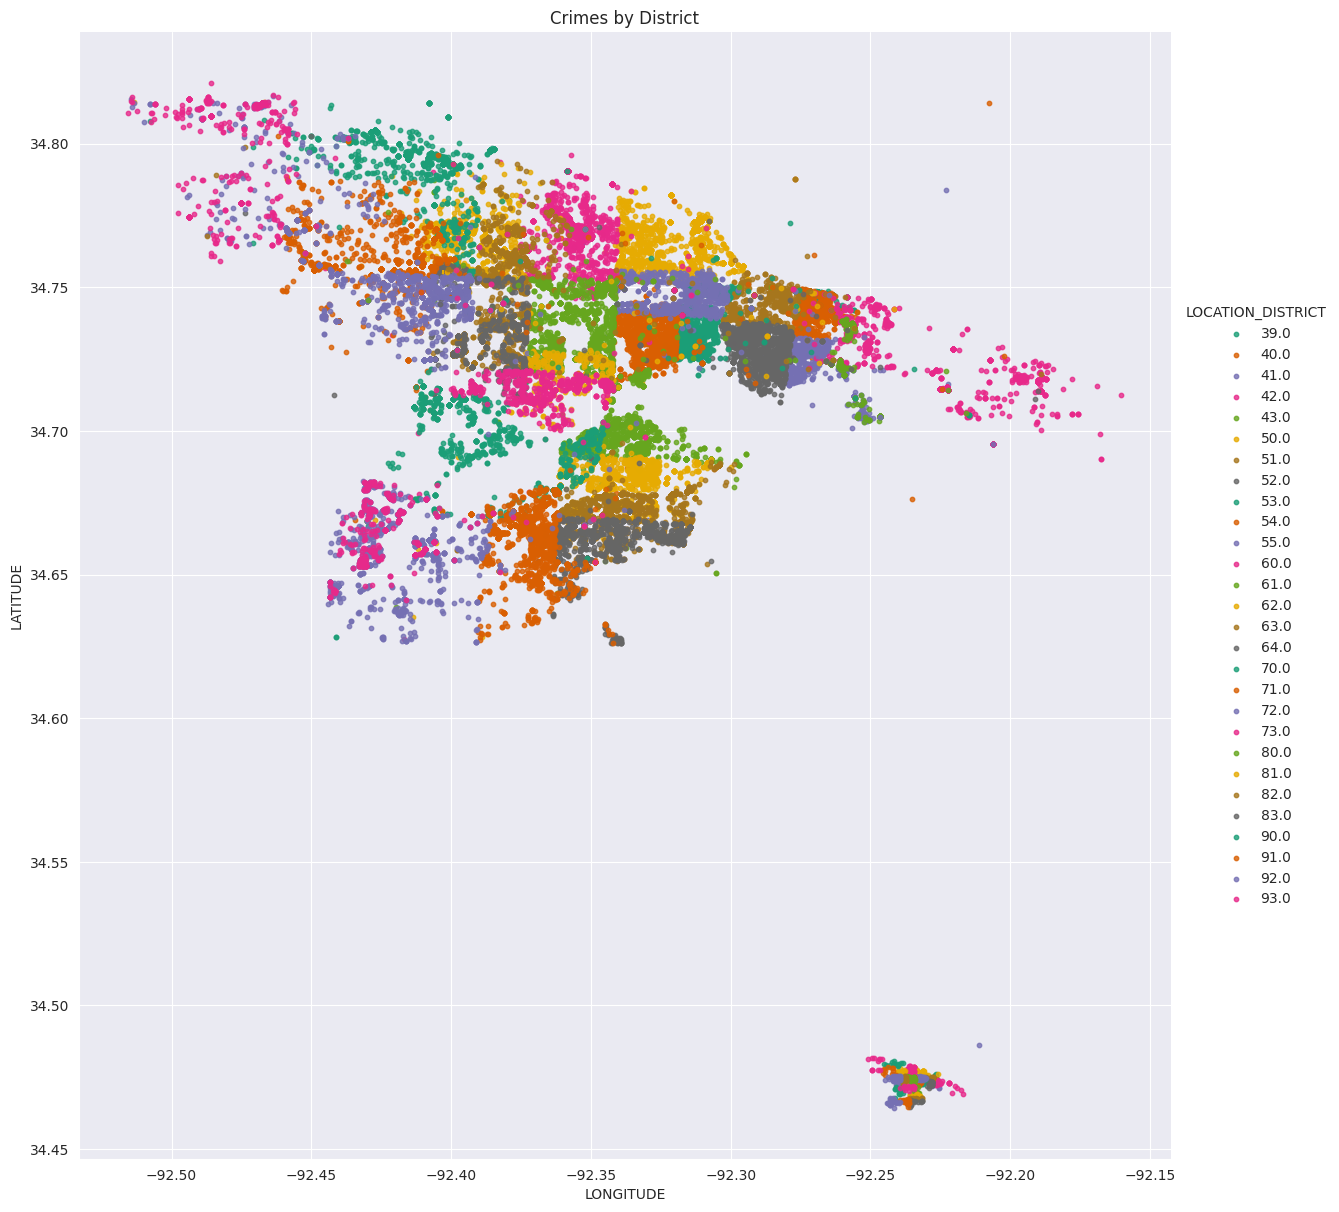

In [ ]:
new_crimes_data4 = full_Crime_Data_012.loc[(full_Crime_Data_012['LATITUDE']!=0)]
sns.lmplot(x = 'LONGITUDE',
           y = 'LATITUDE',
           data=new_crimes_data4[:],
           fit_reg=False,
           hue="LOCATION_DISTRICT",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by District")

Text(0.5, 1.0, 'Crimes by Type')

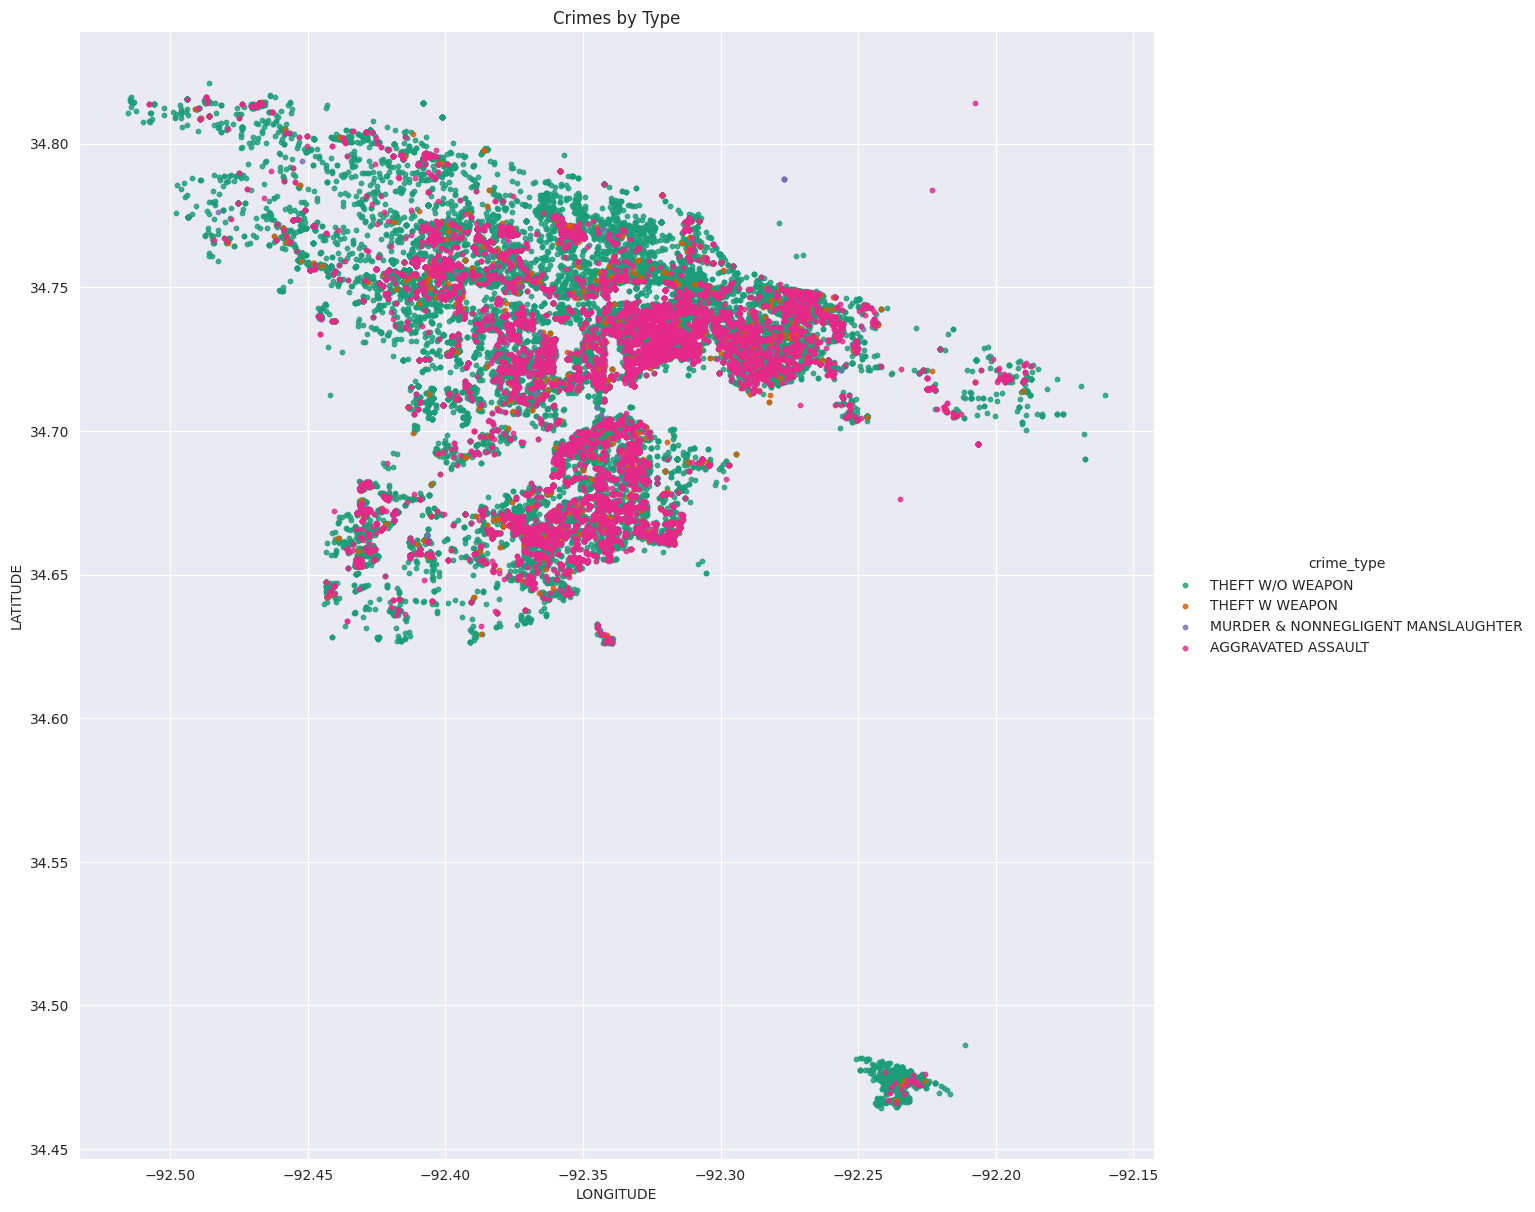

In [ ]:
new_crimes_data = full_Crime_Data_012.loc[(full_Crime_Data_012['LATITUDE']!=0)]
sns.lmplot(x = 'LONGITUDE',
           y = 'LATITUDE',
           data=new_crimes_data[:],
           fit_reg=False,
           hue="crime_type",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by Type")

# **Confusion matrix:**

In [ ]:
#Converting the numercial attributes to categorical attributes
full_Crime_Data_012.year = pd.Categorical(full_Crime_Data_012.year)
full_Crime_Data_012.time = pd.Categorical(full_Crime_Data_012.time)
full_Crime_Data_012.LOCATION_DISTRICT = pd.Categorical(full_Crime_Data_012.LOCATION_DISTRICT)

full_Crime_Data_012.head()

INCIDENT_DATE INCIDENT_NUMBER LOCATION_DISTRICT OFFENSE_CODE  \
0 2020-07-07 18:52:00     2020-075911              93.0          23C   
1 2020-08-14 14:37:00     2020-092890              81.0          23F   
2 2020-10-24 10:37:00     2020-124686              93.0          23C   
3 2020-05-11 10:00:00     2020-058250              90.0          220   
4 2020-12-12 17:46:00     2020-145224              91.0          23C   

        OFFENSE_DESCRIPTION WEAPON_TYPE          INCIDENT_LOCATION  \
0               SHOPLIFTING       NotAv       10720  BASS PRO PKWY   
1  THEFT FROM MOTOR VEHICLE       NotAv        8212  FRENCHMANS LN   
2               SHOPLIFTING       NotAv       11201  BASS PRO PKWY   
3              BURGLARY/B&E       NotAv              7316 GRACE DR   
4               SHOPLIFTING       NotAv  10215  MABELVALE PLAZA DR   

          CITY STATE      ZIP   LATITUDE  LONGITUDE               Location 1  \
0  LITTLE ROCK    AR  72209.0  34.657543 -92.410366  (34.657543, -92.410366)   
1  LITTLE ROCK    AR  72209.0  34.676643 -92.346644  (34.676643, -92.346644)   
2  LITTLE ROCK    AR  72210.0  34.657543 -92.410366  (34.657543, -92.410366)   
3  LITTLE ROCK    AR  72209.0  34.688355 -92.358070   (34.688355, -92.35807)   
4  LITTLE ROCK    AR  72209.0  34.666934 -92.379056  (34.666934, -92.379056)   

  Offense Status day_of_week     month time  year        crime_type  
0             OP     Tuesday      July   18  2020  THEFT W/O WEAPON  
1             OP      Friday    August   14  2020  THEFT W/O WEAPON  
2             OP    Saturday   October   10  2020  THEFT W/O WEAPON  
3             OP      Monday       May   10  2020  THEFT W/O WEAPON  
4             OP    Saturday  December   17  2020  THEFT W/O WEAPON

In [ ]:
crimes_data_prediction = full_Crime_Data_012.drop(['INCIDENT_DATE','INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_DESCRIPTION','WEAPON_TYPE','INCIDENT_LOCATION','CITY','STATE','ZIP','Location 1', 'Offense Status'],axis=1)
crimes_data_prediction.head()

LOCATION_DISTRICT   LATITUDE  LONGITUDE day_of_week     month time  year  \
0              93.0  34.657543 -92.410366     Tuesday      July   18  2020   
1              81.0  34.676643 -92.346644      Friday    August   14  2020   
2              93.0  34.657543 -92.410366    Saturday   October   10  2020   
3              90.0  34.688355 -92.358070      Monday       May   10  2020   
4              91.0  34.666934 -92.379056    Saturday  December   17  2020   

         crime_type  
0  THEFT W/O WEAPON  
1  THEFT W/O WEAPON  
2  THEFT W/O WEAPON  
3  THEFT W/O WEAPON  
4  THEFT W/O WEAPON

In [ ]:
crimes_data_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40300 entries, 0 to 13188
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   LOCATION_DISTRICT  40300 non-null  category
 1   LATITUDE           40300 non-null  float64 
 2   LONGITUDE          40300 non-null  float64 
 3   day_of_week        40300 non-null  object  
 4   month              40300 non-null  object  
 5   time               40300 non-null  category
 6   year               40300 non-null  category
 7   crime_type         40300 non-null  object  
dtypes: category(3), float64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)

In [ ]:
crimes_data_prediction.head()

LATITUDE  LONGITUDE  LOCATION_DISTRICT_40.0  LOCATION_DISTRICT_41.0  \
0  34.657543 -92.410366                       0                       0   
1  34.676643 -92.346644                       0                       0   
2  34.657543 -92.410366                       0                       0   
3  34.688355 -92.358070                       0                       0   
4  34.666934 -92.379056                       0                       0   

   LOCATION_DISTRICT_42.0  LOCATION_DISTRICT_43.0  LOCATION_DISTRICT_50.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   LOCATION_DISTRICT_51.0  LOCATION_DISTRICT_52.0  LOCATION_DISTRICT_53.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   ...  time_19  time_20  time_21  time_22  time_23  year_2021  year_2022  \
0  ...        0        0        0        0        0          0          0   
1  ...        0        0        0        0        0          0          0   
2  ...        0        0        0        0        0          0          0   
3  ...        0        0        0        0        0          0          0   
4  ...        0        0        0        0        0          0          0   

   crime_type_MURDER & NONNEGLIGENT MANSLAUGHTER  crime_type_THEFT W WEAPON  \
0                                              0                          0   
1                                              0                          0   
2                                              0                          0   
3                                              0                          0   
4                                              0                          0   

   crime_type_THEFT W/O WEAPON  
0                            1  
1                            1  
2                            1  
3                            1  
4                            1  

[5 rows x 74 columns]

In [ ]:
crimes_data_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40300 entries, 0 to 13188
Data columns (total 74 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   LATITUDE                                       40300 non-null  float64
 1   LONGITUDE                                      40300 non-null  float64
 2   LOCATION_DISTRICT_40.0                         40300 non-null  uint8  
 3   LOCATION_DISTRICT_41.0                         40300 non-null  uint8  
 4   LOCATION_DISTRICT_42.0                         40300 non-null  uint8  
 5   LOCATION_DISTRICT_43.0                         40300 non-null  uint8  
 6   LOCATION_DISTRICT_50.0                         40300 non-null  uint8  
 7   LOCATION_DISTRICT_51.0                         40300 non-null  uint8  
 8   LOCATION_DISTRICT_52.0                         40300 non-null  uint8  
 9   LOCATION_DISTRICT_53.0                         403

In [ ]:
#Train test split with a test set size of 30% of entire data
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction.drop(['LOCATION_DISTRICT_40.0'],axis=1), crimes_data_prediction['LOCATION_DISTRICT_40.0'], test_size=0.3, random_state=42)


In [ ]:
#Standardizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Random Forest classifier  - Best one
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[11635    27]
 [   37   391]]


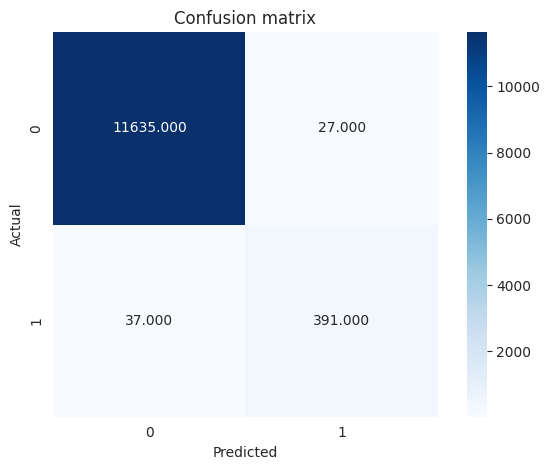

In [ ]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.9947063688999173
Error =  0.005293631100082741
Precision =  0.9354066985645934
Recall =  0.9135514018691588
F-1 Score =  0.9243498817966904
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11662
           1       0.94      0.91      0.92       428

    accuracy                           0.99     12090
   macro avg       0.97      0.96      0.96     12090
weighted avg       0.99      0.99      0.99     12090



# **K-means Cluster**

**Elbow method and silhouette method**

In [ ]:
full_Crime_Data_2022["crime_type"].unique()

array(['THEFT W/O WEAPON', 'THEFT W WEAPON',
       'MURDER & NONNEGLIGENT MANSLAUGHTER', 'AGGRAVATED ASSAULT'],
      dtype=object)

In [ ]:
# Calculated the number of occrurances for each type of crime category in each district
district_crime_rates = pd.DataFrame(columns=['theft_wo_w_count', 'assault_count', 'murder_count',
                                             'theft_w_w_count'])
district_crime_rates = district_crime_rates.astype(int)

for i in range(39, 93):
    temp_district_df = full_Crime_Data_012[full_Crime_Data_012['LOCATION_DISTRICT'] == i]

    temp_district_theft = temp_district_df[temp_district_df['crime_type'] == 'THEFT W WEAPON']
    num_theft_w_weapon = temp_district_theft.crime_type.count()

    temp_district_assault = temp_district_df[temp_district_df['crime_type'] == 'AGGRAVATED ASSAULT']
    num_assault = temp_district_assault.crime_type.count()

    temp_district_murder = temp_district_df[temp_district_df['crime_type'] == 'MURDER & NONNEGLIGENT MANSLAUGHTER']
    num_murder = temp_district_murder.crime_type.count()

    temp_district_theft2 = temp_district_df[temp_district_df['crime_type'] == 'THEFT W/O WEAPON']
    num_theft_wo_weapon = temp_district_theft2.crime_type.count()


    district_crime_rates.loc[i] = [num_theft_w_weapon, num_assault, num_murder, num_theft_wo_weapon]

district_crime_rates.head()

theft_wo_w_count  assault_count  murder_count  theft_w_w_count
39                20             73             0              374
40                79            216             2             1096
41                24            181             8              678
42                19            290             6              736
43                 3             84             0              111

 **Using district_crime_rates**

In [ ]:
'''
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(district_crime_rates)
    distortions.append(kmeanModel.inertia_)
'''

'\ndistortions = []\nK = range(1,10)\nfor k in K:\n    kmeanModel = KMeans(n_clusters=k)\n    kmeanModel.fit(district_crime_rates)\n    distortions.append(kmeanModel.inertia_)\n'

In [ ]:
'''
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
'''

"\nplt.figure(figsize=(16,8))\nplt.plot(K, distortions, 'bx-')\nplt.xlabel('k')\nplt.ylabel('Distortion')\nplt.title('The Elbow Method showing the optimal k')\nplt.show()\n"

In [ ]:
'''
from sklearn.metrics import silhouette_score

sil_avg = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for k in range_n_clusters:
 kmeans = KMeans(n_clusters = k).fit(district_crime_rates)
 labels = kmeans.labels_
 sil_avg.append(silhouette_score(district_crime_rates, labels, metric = 'euclidean'))

 '''

"\nfrom sklearn.metrics import silhouette_score\n\nsil_avg = []\nrange_n_clusters = [2, 3, 4, 5, 6, 7, 8]\n\nfor k in range_n_clusters:\n kmeans = KMeans(n_clusters = k).fit(district_crime_rates)\n labels = kmeans.labels_\n sil_avg.append(silhouette_score(district_crime_rates, labels, metric = 'euclidean'))\n\n "

In [ ]:
'''
plt.plot(range_n_clusters,sil_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()
'''

"\nplt.plot(range_n_clusters,sil_avg,'bx-')\nplt.xlabel('Values of K')\nplt.ylabel('Silhouette score')\nplt.title('Silhouette analysis For Optimal k')\nplt.show()\n"

**Using district_crime_rates_standardized**

In [ ]:
district_crime_rates_standardized = preprocessing.scale(district_crime_rates)
district_crime_rates_standardized = pd.DataFrame(district_crime_rates_standardized)
district_crime_rates_standardized.head()

0         1         2         3
0 -0.109168 -0.423859 -0.652328 -0.253866
1  1.801870  0.220440 -0.260931  0.914282
2  0.020394  0.062744  0.913259  0.237986
3 -0.141558  0.553853  0.521862  0.331826
4 -0.659806 -0.374297 -0.652328 -0.679382

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(district_crime_rates_standardized)
    distortions.append(kmeanModel.inertia_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

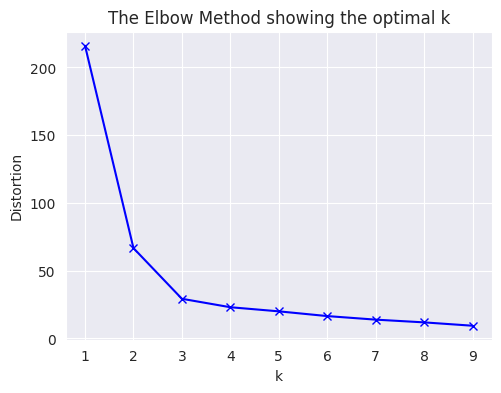

In [ ]:
plt.figure(figsize=(5.5,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil_avg = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for k in range_n_clusters:
 kmeans = KMeans(n_clusters = k).fit(district_crime_rates_standardized)
 labels = kmeans.labels_
 sil_avg.append(silhouette_score(district_crime_rates_standardized, labels, metric = 'euclidean'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

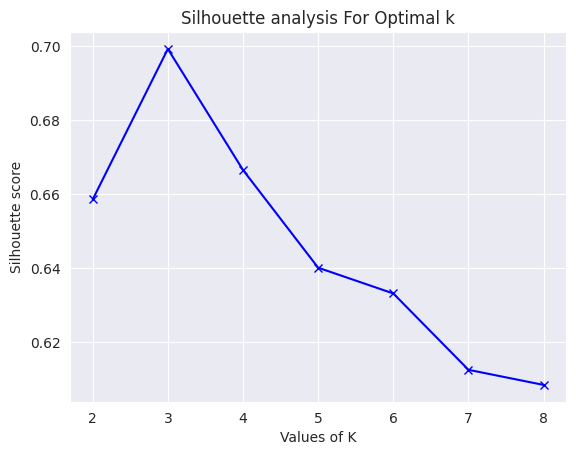

In [ ]:
plt.plot(range_n_clusters,sil_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

**Applying k means**

In [ ]:
# Clustering with K-Means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(district_crime_rates_standardized)
#y_kmeans

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
kmeans_clusters = list(y_kmeans1)
# Adding cluster to our data set
district_crime_rates['kmeans_cluster'] = kmeans_clusters

#Mean of clusters 1 to 3
kmeans_mean_cluster = pd.DataFrame(round(district_crime_rates.groupby('kmeans_cluster').mean(),1))
#kmeans_mean_cluster

district_crime_rates.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


theft_wo_w_count  assault_count  murder_count  theft_w_w_count  \
39                20             73             0              374   
40                79            216             2             1096   
41                24            181             8              678   
42                19            290             6              736   
43                 3             84             0              111   

    kmeans_cluster  
39               1  
40               2  
41               2  
42               2  
43               1

# Other clusters

In [ ]:
# Clustering with DBSCAN
clustering = DBSCAN(eps = 1, min_samples = 3, metric = "euclidean").fit(district_crime_rates_standardized)

# Show clusters
dbscan_clusters = clustering.labels_
# print(clusters)

district_crime_rates['dbscan_clusters'] = dbscan_clusters + 2
#district_crime_rates.head()

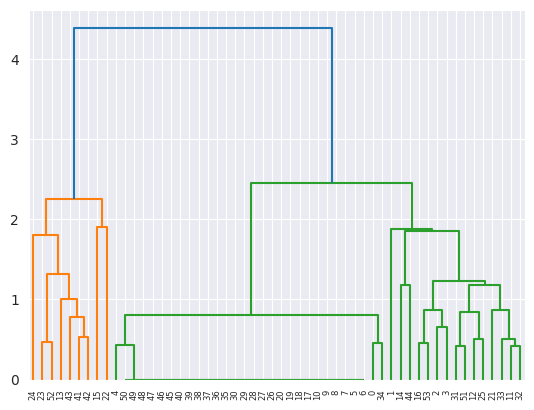

In [ ]:
# Clustering with Hierarchical Clustering with average linkage
clustering = linkage(district_crime_rates_standardized, method = "average", metric = "euclidean")

# Plot dendrogram
plt.figure()
dendrogram(clustering)
plt.show()

# Form clusters
hierarchical_clusters = fcluster(clustering, 3, criterion = 'maxclust')
# print(clusters)

district_crime_rates['hierarchical_clusters'] = hierarchical_clusters
#district_crime_rates.head()

In [ ]:
# Add 'district' column
district_crime_rates['LOCATION_DISTRICT'] = district_crime_rates.index
district_crime_rates = district_crime_rates[['LOCATION_DISTRICT', 'kmeans_cluster', 'dbscan_clusters', 'hierarchical_clusters', 'theft_wo_w_count', 'assault_count', 'murder_count', 'theft_w_w_count']]


In [ ]:
# Remove all columns but 'district' & each method's cluster
district_crime_rates = district_crime_rates.drop(['theft_wo_w_count', 'assault_count', 'murder_count', 'theft_w_w_count'], axis=1)


In [ ]:
district_crime_rates.head(93)

LOCATION_DISTRICT  kmeans_cluster  dbscan_clusters  hierarchical_clusters
39                 39               1                2                      2
40                 40               2                1                      3
41                 41               2                2                      3
42                 42               2                2                      3
43                 43               1                2                      2
44                 44               1                2                      2
45                 45               1                2                      2
46                 46               1                2                      2
47                 47               1                2                      2
48                 48               1                2                      2
49                 49               1                2                      2
50                 50               2                2                      3
51                 51               2                2                      3
52                 52               3                3                      1
53                 53               2                2                      3
54                 54               3                1                      1
55                 55               2                2                      3
56                 56               1                2                      2
57                 57               1                2                      2
58                 58               1                2                      2
59                 59               1                2                      2
60                 60               2                2                      3
61                 61               3                1                      1
62                 62               3                1                      1
63                 63               3                1                      1
64                 64               2                2                      3
65                 65               1                2                      2
66                 66               1                2                      2
67                 67               1                2                      2
68                 68               1                2                      2
69                 69               1                2                      2
70                 70               2                2                      3
71                 71               2                2                      3
72                 72               2                2                      3
73                 73               1                2                      2
74                 74               1                2                      2
75                 75               1                2                      2
76                 76               1                2                      2
77                 77               1                2                      2
78                 78               1                2                      2
79                 79               1                2                      2
80                 80               3                3                      1
81                 81               3                3                      1
82                 82               3                3                      1
83                 83               2                1                      3
84                 84               1                2                      2
85                 85               1                2                      2
86                 86               1                2                      2
87                 87               1                2                      2
88                 88               1                2                      2
89                 89     

# Visualized

In [ ]:
# Merge each district's clusters for each method into a single dataframe
crimes_data_clustered = pd.merge(full_Crime_Data_012, district_crime_rates, on='LOCATION_DISTRICT', how='inner')
crimes_data_clustered

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0     2020-08-14 14:37:00     2020-092890               81.0          23F   
1     2020-08-28 11:22:00     2020-099213               81.0          23C   
2     2020-11-06 12:18:00     2020-130119               81.0          23D   
3     2020-03-24 12:00:00     2020-035231               81.0          23D   
4     2020-11-28 17:45:00     2020-139438               81.0          220   
...                   ...             ...                ...          ...   
39128 2022-08-19 15:30:00     2022-098525               39.0          13A   
39129 2022-08-19 15:30:00     2022-098525               39.0          13A   
39130 2022-05-17 16:25:00     2022-057033               39.0          13A   
39131 2022-08-19 15:30:00     2022-098525               39.0          13A   
39132 2022-03-27 01:42:00     2022-034644               39.0          13A   

            OFFENSE_DESCRIPTION    WEAPON_TYPE        INCIDENT_LOCATION  \
0      THEFT FROM MOTOR VEHICLE          NotAv      8212  FRENCHMANS LN   
1                   SHOPLIFTING          NotAv    8824 GEYER SPRINGS RD   
2           THEFT FROM BUILDING          NotAv           6620  YOUNG RD   
3           THEFT FROM BUILDING          NotAv         5300 BASELINE RD   
4                  BURGLARY/B&E          NotAv  7700  SCOTT HAMILTON DR   
...                         ...            ...                      ...   
39128        AGGRAVATED ASSAULT  OTHER FIREARM            1 CHAMBER PLZ   
39129        AGGRAVATED ASSAULT  OTHER FIREARM            1 CHAMBER PLZ   
39130        AGGRAVATED ASSAULT        HANDGUN              315 MAIN ST   
39131        AGGRAVATED ASSAULT  OTHER FIREARM            1 CHAMBER PLZ   
39132        AGGRAVATED ASSAULT        FIREARM         225 E MARKHAM ST   

              CITY STATE      ZIP  ...               Location 1  \
0      LITTLE ROCK    AR  72209.0  ...  (34.676643, -92.346644)   
1      LITTLE ROCK    AR  72209.0  ...  (34.670636, -92.345837)   
2      LITTLE ROCK    AR  72209.0  ...  (34.680713, -92.350953)   
3      LITTLE ROCK    AR  72209.0  ...  (34.670112, -92.337504)   
4      LITTLE ROCK    AR  72209.0  ...  (34.677975, -92.319935)   
...            ...   ...      ...  ...                      ...   
39128  LITTLE ROCK    AR  72201.0  ...  (34.748228, -92.268726)   
39129  LITTLE ROCK    AR  72201.0  ...  (34.748228, -92.268726)   
39130  LITTLE ROCK    AR  72201.0  ...  (34.745667, -92.270518)   
39131  LITTLE ROCK    AR  72201.0  ...  (34.748228, -92.268726)   
39132  LITTLE ROCK    AR  72201.0  ...  (34.747762, -92.267927)   

       Offense Status day_of_week     month time  year          crime_type  \
0                  OP      Friday    August   14  2020    THEFT W/O WEAPON   
1                  OP      Friday    August   11  2020    THEFT W/O WEAPON   
2                  OP      Friday  November   12  2020    THEFT W/O WEAPON   
3                  OP     Tuesday     March   12  2020    THEFT W/O WEAPON   
4                  OP    Saturday  November   17  2020    THEFT W/O WEAPON   
...               ...         ...       ...  ...   ...                 ...   
39128              AR      Friday    August   15  2022  AGGRAVATED ASSAULT   
39129              AR      Friday    August   15  2022  AGGRAVATED ASSAULT   
39130              AC     Tuesday       May   16  2022  AGGRAVATED ASSAULT   
39131              AR      Friday    August   15  2022  AGGRAVATED ASSAULT   
39132              AR      Sunday     March    1  2022  AGGRAVATED ASSAULT   

      kmeans_cluster dbscan_clusters  hierarchical_clusters  
0                  3               3                      1  
1                  3               3                      1  
2                  3               3                      1  
3                  3               3                      1  
4                  3               3                      1  
...              ...             ...                    ...  
39128     

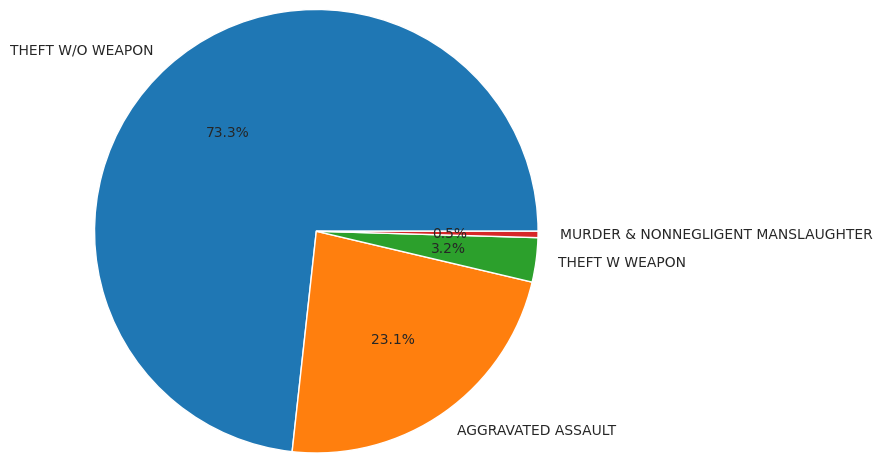

In [ ]:
crimes_data_clustered_pie = plt.pie(crimes_data_clustered.crime_type.value_counts(),labels=crimes_data_clustered.crime_type.value_counts().index,autopct='%1.1f%%',radius=1.5)
#plt.legend(loc = 'best')

Text(0.5, 1.0, 'KMeans Clustering of Crimes by District')

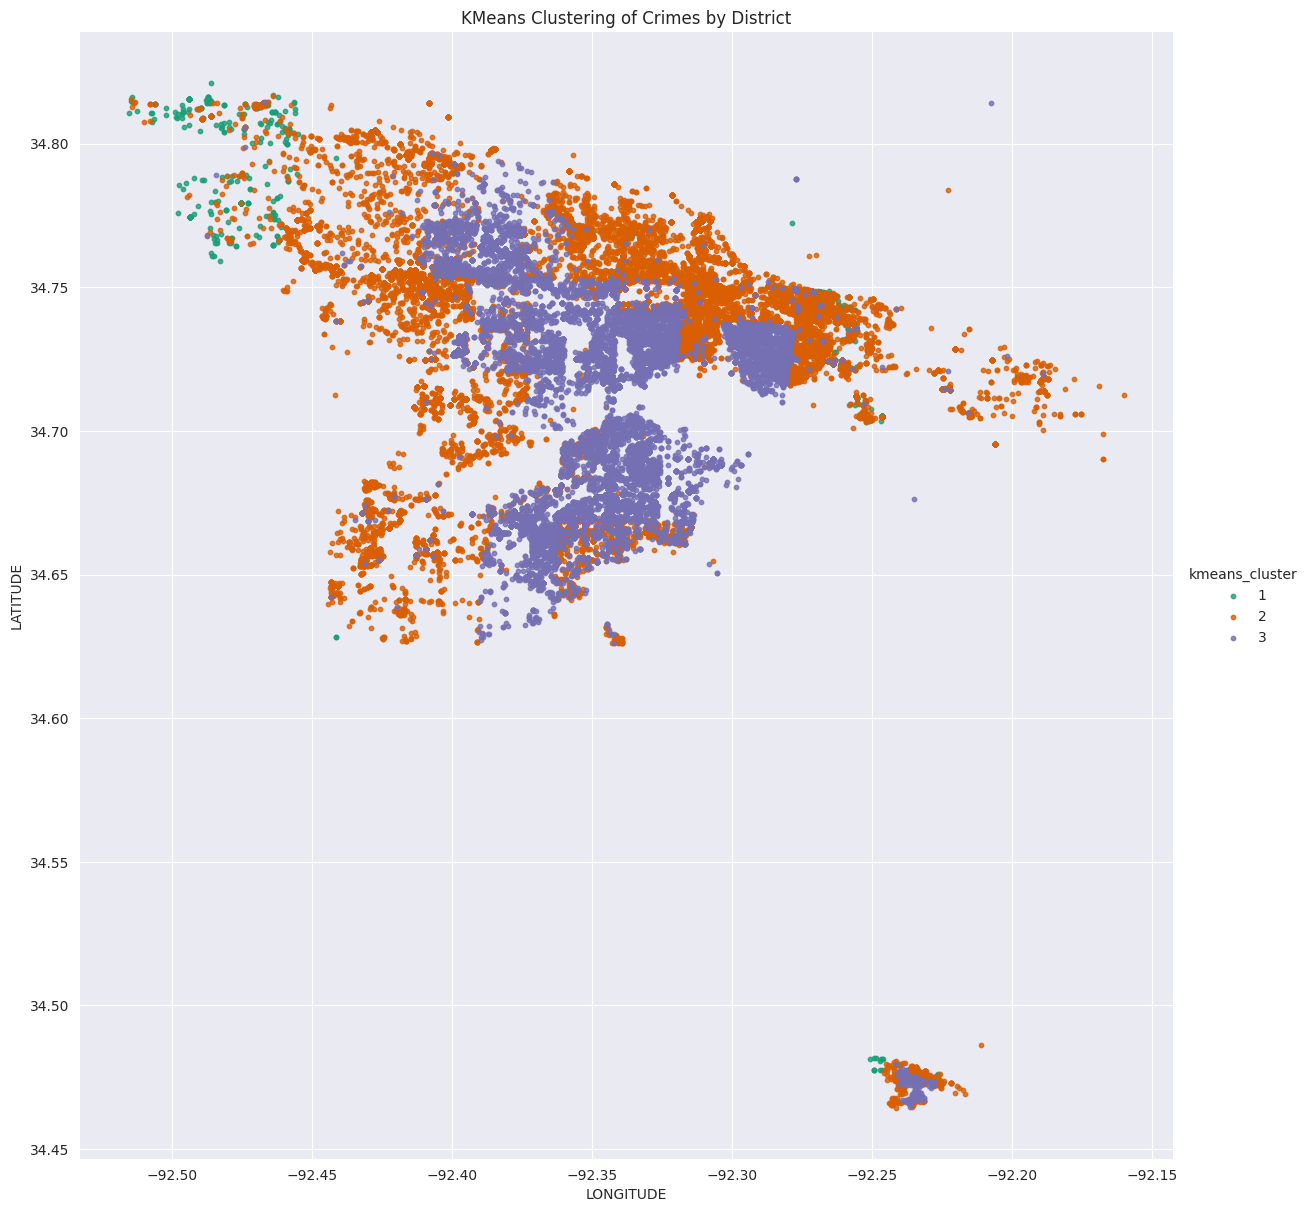

In [ ]:
# Crime level clusters by district (KMeans Clustering)
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['LATITUDE']!=0)]
sns.lmplot(x = 'LONGITUDE',
           y = 'LATITUDE',
           data=new_crimes_data[:],
           fit_reg=False,
           hue="kmeans_cluster",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("KMeans Clustering of Crimes by District")

cluster 1

In [ ]:
kmeans1 = crimes_data_clustered['kmeans_cluster'] ==  1
cluster1 = crimes_data_clustered[kmeans1]
cluster1

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
38077 2020-12-23 11:06:00     2020-148163               73.0          23F   
38078 2020-12-24 00:00:00     2020-148420               73.0          23D   
38079 2020-11-23 10:03:00     2020-137322               73.0          23G   
38080 2020-04-25 12:00:00     2020-045144               73.0          23G   
38081 2020-04-17 02:00:00     2020-041799               73.0          23G   
...                   ...             ...                ...          ...   
39128 2022-08-19 15:30:00     2022-098525               39.0          13A   
39129 2022-08-19 15:30:00     2022-098525               39.0          13A   
39130 2022-05-17 16:25:00     2022-057033               39.0          13A   
39131 2022-08-19 15:30:00     2022-098525               39.0          13A   
39132 2022-03-27 01:42:00     2022-034644               39.0          13A   

                OFFENSE_DESCRIPTION    WEAPON_TYPE  INCIDENT_LOCATION  \
38077      THEFT FROM MOTOR VEHICLE          NotAv      1 TOURNAY CIR   
38078           THEFT FROM BUILDING          NotAv   115 ROSEMARY WAY   
38079  THEFT OF MOTOR VEHICLE PARTS          NotAv   24800 CHENAL PKY   
38080  THEFT OF MOTOR VEHICLE PARTS          NotAv  19301 CANTRELL RD   
38081  THEFT OF MOTOR VEHICLE PARTS          NotAv   24800 CHENAL PKY   
...                             ...            ...                ...   
39128            AGGRAVATED ASSAULT  OTHER FIREARM      1 CHAMBER PLZ   
39129            AGGRAVATED ASSAULT  OTHER FIREARM      1 CHAMBER PLZ   
39130            AGGRAVATED ASSAULT        HANDGUN        315 MAIN ST   
39131            AGGRAVATED ASSAULT  OTHER FIREARM      1 CHAMBER PLZ   
39132            AGGRAVATED ASSAULT        FIREARM   225 E MARKHAM ST   

              CITY STATE      ZIP  ...               Location 1  \
38077  LITTLE ROCK    AR  72223.0  ...  (34.481318, -92.250882)   
38078  LITTLE ROCK    AR  72223.0  ...   (34.709618, -92.37065)   
38079  LITTLE ROCK    AR  72223.0  ...   (34.808633, -92.48926)   
38080  LITTLE ROCK    AR  72223.0  ...  (34.809619, -92.485927)   
38081  LITTLE ROCK    AR  72223.0  ...   (34.808633, -92.48926)   
...            ...   ...      ...  ...                      ...   
39128  LITTLE ROCK    AR  72201.0  ...  (34.748228, -92.268726)   
39129  LITTLE ROCK    AR  72201.0  ...  (34.748228, -92.268726)   
39130  LITTLE ROCK    AR  72201.0  ...  (34.745667, -92.270518)   
39131  LITTLE ROCK    AR  72201.0  ...  (34.748228, -92.268726)   
39132  LITTLE ROCK    AR  72201.0  ...  (34.747762, -92.267927)   

       Offense Status day_of_week     month time  year          crime_type  \
38077              OP   Wednesday  December   11  2020    THEFT W/O WEAPON   
38078              EX    Thursday  December    0  2020    THEFT W/O WEAPON   
38079              OP      Monday  November   10  2020    THEFT W/O WEAPON   
38080              OP    Saturday     April   12  2020    THEFT W/O WEAPON   
38081              OP      Friday     April    2  2020    THEFT W/O WEAPON   
...               ...         ...       ...  ...   ...                 ...   
39128              AR      Friday    August   15  2022  AGGRAVATED ASSAULT   
39129              AR      Friday    August   15  2022  AGGRAVATED ASSAULT   
39130              AC     Tuesday       May   16  2022  AGGRAVATED ASSAULT   
39131              AR      Friday    August   15  2022  AGGRAVATED ASSAULT   
39132              AR      Sunday     March    1  2022  AGGRAVATED ASSAULT   

      kmeans_cluster dbscan_clusters  hierarchical_clusters  
38077              1               2                      2  
38078              1               2                      2  
38079              1               2                      2  
38080              1               2                      2  
38081              1               2                      2  
...              ...             ...                    ...  
39128              1              

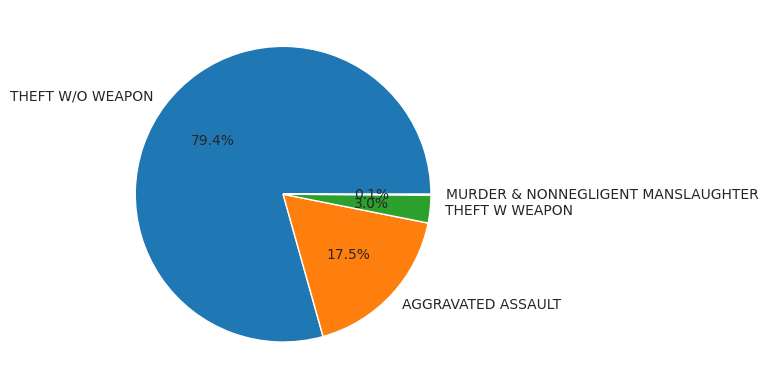

In [ ]:
cluster1_pie = plt.pie(cluster1.crime_type.value_counts(),labels=cluster1.crime_type.value_counts().index,autopct='%1.1f%%',radius=1)

cluster 2

In [ ]:
kmeans2 = crimes_data_clustered['kmeans_cluster'] ==  2
cluster2 = crimes_data_clustered[kmeans2]
cluster2

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
1949  2020-05-11 10:00:00     2020-058250               90.0          220   
1950  2020-11-24 08:31:00     2020-137727               90.0          23F   
1951  2020-08-09 10:22:00     2020-090654               90.0          23F   
1952  2020-08-30 23:18:00     2020-100364               90.0          220   
1953  2020-08-31 08:17:00     2020-100456               90.0          240   
...                   ...             ...                ...          ...   
34139 2022-09-13 15:23:00     2022-109360               71.0          13A   
34140 2022-05-25 19:06:00     2022-060628               71.0          13A   
34141 2022-05-25 19:06:00     2022-060628               71.0          13A   
34142 2022-04-15 10:50:00     2022-042956               71.0          13A   
34143 2022-03-18 14:57:00     2022-031112               71.0          13A   

            OFFENSE_DESCRIPTION WEAPON_TYPE       INCIDENT_LOCATION  \
1949               BURGLARY/B&E       NotAv           7316 GRACE DR   
1950   THEFT FROM MOTOR VEHICLE       NotAv              31  IVY DR   
1951   THEFT FROM MOTOR VEHICLE       NotAv         7312  DEBBIE DR   
1952               BURGLARY/B&E       NotAv         6912  MORGAN DR   
1953        MOTOR VEHICLE THEFT       NotAv       6624  CAROLINA DR   
...                         ...         ...                     ...   
34139        AGGRAVATED ASSAULT     FIREARM      420 NAPA VALLEY DR   
34140        AGGRAVATED ASSAULT     FIREARM      420 NAPA VALLEY DR   
34141        AGGRAVATED ASSAULT     FIREARM      420 NAPA VALLEY DR   
34142        AGGRAVATED ASSAULT     HANDGUN      12500 W MARKHAM ST   
34143        AGGRAVATED ASSAULT     HANDGUN  16401 CHENAL VALLEY DR   

              CITY STATE      ZIP  ...               Location 1  \
1949   LITTLE ROCK    AR  72209.0  ...   (34.688355, -92.35807)   
1950   LITTLE ROCK    AR  72209.0  ...  (34.695671, -92.348883)   
1951   LITTLE ROCK    AR  72209.0  ...  (34.690227, -92.358245)   
1952   LITTLE ROCK    AR  72209.0  ...  (34.687161, -92.358679)   
1953   LITTLE ROCK    AR  72209.0  ...  (34.690106, -92.360678)   
...            ...   ...      ...  ...                      ...   
34139  LITTLE ROCK    AR  72211.0  ...   (34.756975, -92.40722)   
34140  LITTLE ROCK    AR  72211.0  ...  (34.760178, -92.410867)   
34141  LITTLE ROCK    AR  72211.0  ...  (34.760178, -92.410867)   
34142  LITTLE ROCK    AR  72211.0  ...  (34.754595, -92.412123)   
34143  LITTLE ROCK    AR  72223.0  ...   (34.77381, -92.453552)   

       Offense Status day_of_week      month time  year          crime_type  \
1949               OP      Monday        May   10  2020    THEFT W/O WEAPON   
1950               OP     Tuesday   November    8  2020    THEFT W/O WEAPON   
1951               OP      Sunday     August   10  2020    THEFT W/O WEAPON   
1952               OP      Sunday     August   23  2020    THEFT W/O WEAPON   
1953               OP      Monday     August    8  2020    THEFT W/O WEAPON   
...               ...         ...        ...  ...   ...                 ...   
34139              OP     Tuesday  September   15  2022  AGGRAVATED ASSAULT   
34140              AC   Wednesday        May   19  2022  AGGRAVATED ASSAULT   
34141              AC   Wednesday        May   19  2022  AGGRAVATED ASSAULT   
34142              OP      Friday      April   10  2022  AGGRAVATED ASSAULT   
34143              EX      Friday      March   14  2022  AGGRAVATED ASSAULT   

      kmeans_cluster dbscan_clusters  hierarchical_clusters  
1949               2               2                      3  
1950               2               2                      3  
1951               2               2                      3  
1952               2               2                      3  
1953               2               2                      3  
...              ...             ...                    ...  
34139              2               2          

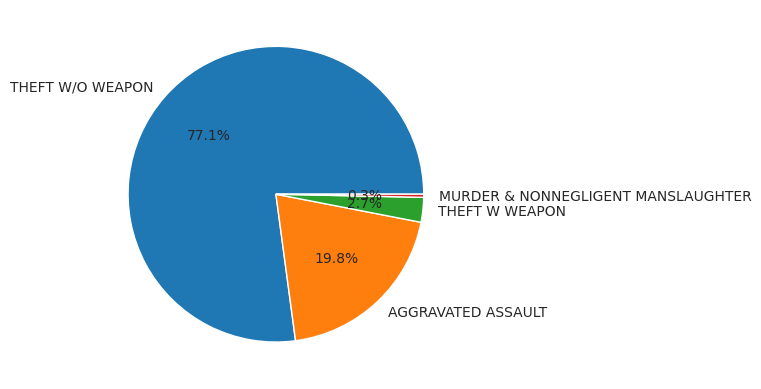

In [ ]:
cluster2_pie = plt.pie(cluster2.crime_type.value_counts(),labels=cluster2.crime_type.value_counts().index,autopct='%1.1f%%',radius=1)

cluster 3

In [ ]:
kmeans3 = crimes_data_clustered['kmeans_cluster'] ==  3
cluster3 = crimes_data_clustered[kmeans3]
cluster3

INCIDENT_DATE INCIDENT_NUMBER  LOCATION_DISTRICT OFFENSE_CODE  \
0     2020-08-14 14:37:00     2020-092890               81.0          23F   
1     2020-08-28 11:22:00     2020-099213               81.0          23C   
2     2020-11-06 12:18:00     2020-130119               81.0          23D   
3     2020-03-24 12:00:00     2020-035231               81.0          23D   
4     2020-11-28 17:45:00     2020-139438               81.0          220   
...                   ...             ...                ...          ...   
38072 2022-12-29 11:53:00     2022-152034               52.0          13A   
38073 2022-03-08 14:50:00     2022-026990               52.0          13A   
38074 2022-02-01 21:50:00     2022-012887               52.0          13A   
38075 2022-05-03 01:54:00     2022-050425               52.0          13A   
38076 2022-07-02 02:35:00     2022-077365               52.0          13A   

            OFFENSE_DESCRIPTION                           WEAPON_TYPE  \
0      THEFT FROM MOTOR VEHICLE                                 NotAv   
1                   SHOPLIFTING                                 NotAv   
2           THEFT FROM BUILDING                                 NotAv   
3           THEFT FROM BUILDING                                 NotAv   
4                  BURGLARY/B&E                                 NotAv   
...                         ...                                   ...   
38072        AGGRAVATED ASSAULT                          BLUNT OBJECT   
38073        AGGRAVATED ASSAULT              KNIFE/CUTTING INSTRUMENT   
38074        AGGRAVATED ASSAULT                          BLUNT OBJECT   
38075        AGGRAVATED ASSAULT  PERSONAL WEAPONS (HANDS, FISTS, ETC)   
38076        AGGRAVATED ASSAULT                               HANDGUN   

             INCIDENT_LOCATION         CITY STATE      ZIP  ...  \
0          8212  FRENCHMANS LN  LITTLE ROCK    AR  72209.0  ...   
1        8824 GEYER SPRINGS RD  LITTLE ROCK    AR  72209.0  ...   
2               6620  YOUNG RD  LITTLE ROCK    AR  72209.0  ...   
3             5300 BASELINE RD  LITTLE ROCK    AR  72209.0  ...   
4      7700  SCOTT HAMILTON DR  LITTLE ROCK    AR  72209.0  ...   
...                        ...          ...   ...      ...  ...   
38072           2007 HOWARD ST  LITTLE ROCK    AR  72201.0  ...   
38073           1500 S PARK ST  LITTLE ROCK    AR  72202.0  ...   
38074         1622 DENNISON ST  LITTLE ROCK    AR  72202.0  ...   
38075            1519 WOLFE ST  LITTLE ROCK    AR  72202.0  ...   
38076        1623 S PULASKI ST  LITTLE ROCK    AR  72201.0  ...   

                    Location 1  Offense Status day_of_week     month time  \
0      (34.676643, -92.346644)              OP      Friday    August   14   
1      (34.670636, -92.345837)              OP      Friday    August   11   
2      (34.680713, -92.350953)              OP      Friday  November   12   
3      (34.670112, -92.337504)              OP     Tuesday     March   12   
4      (34.677975, -92.319935)              OP    Saturday  November   17   
...                        ...             ...         ...       ...  ...   
38072  (34.748763, -92.277122)              OP    Thursday  December   11   
38073   (34.736948, -92.30116)              AJ     Tuesday     March   14   
38074  (34.734998, -92.299343)              OP     Tuesday  February   21   
38075  (34.735897, -92.292779)              AR     Tuesday       May    1   
38076  (34.734473, -92.287431)              AR    Saturday      July    2   

       year          crime_type kmeans_cluster dbscan_clusters  \
0      2020    THEFT W/O WEAPON              3               3   
1      2020    THEFT W/O WEAPON              3               3   
2      2020    THEFT W/O WEAPON              3               3   
3      2020    THEFT W/O WEAPON              3               3   
4      2020    THEFT W/O WEAPON              3               3   
...     ...                 ...            ...             ...   
38072  2022  AGGRA

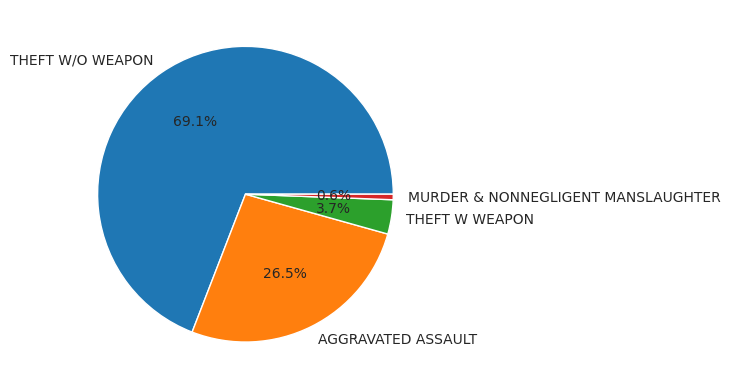

In [ ]:
cluster3_pie = plt.pie(cluster3.crime_type.value_counts(),labels=cluster3.crime_type.value_counts().index,autopct='%1.1f%%',radius=1)

# Not K-means

Text(0.5, 1.0, 'DBScan Clustering of Crimes by District')

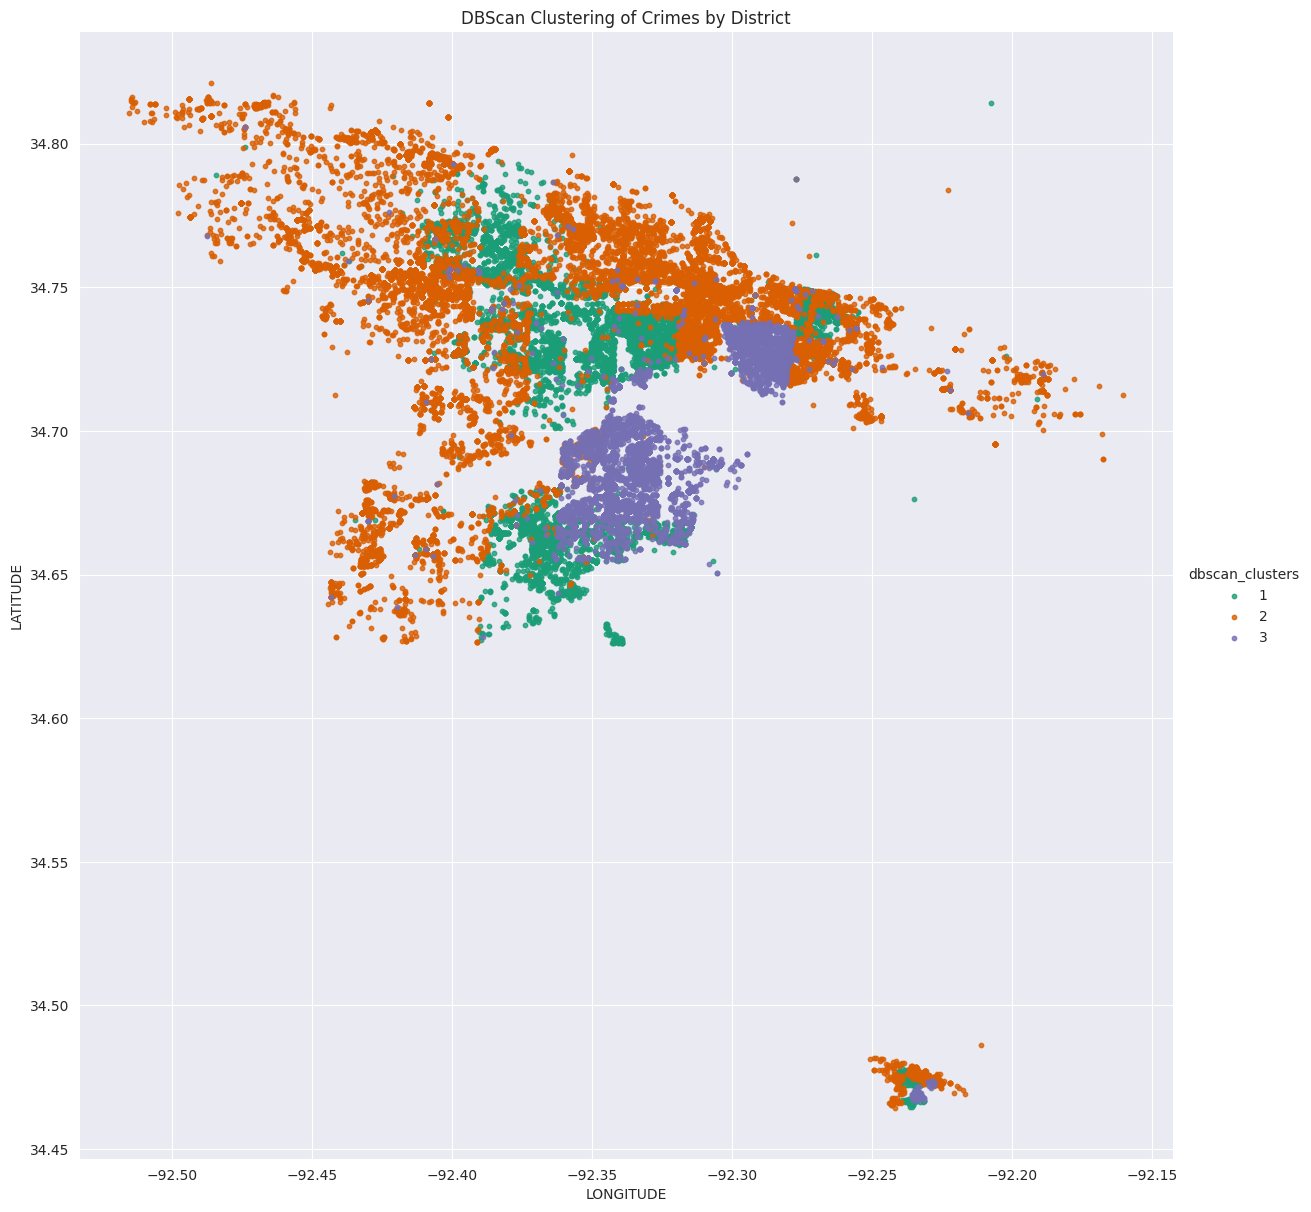

In [ ]:
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['LATITUDE']!=0)]
sns.lmplot(x = 'LONGITUDE',
           y = 'LATITUDE',
           data=new_crimes_data[:],
           fit_reg=False,
           hue="dbscan_clusters",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("DBScan Clustering of Crimes by District")

Text(0.5, 1.0, 'Hierarchical Clustering of Crimes by District')

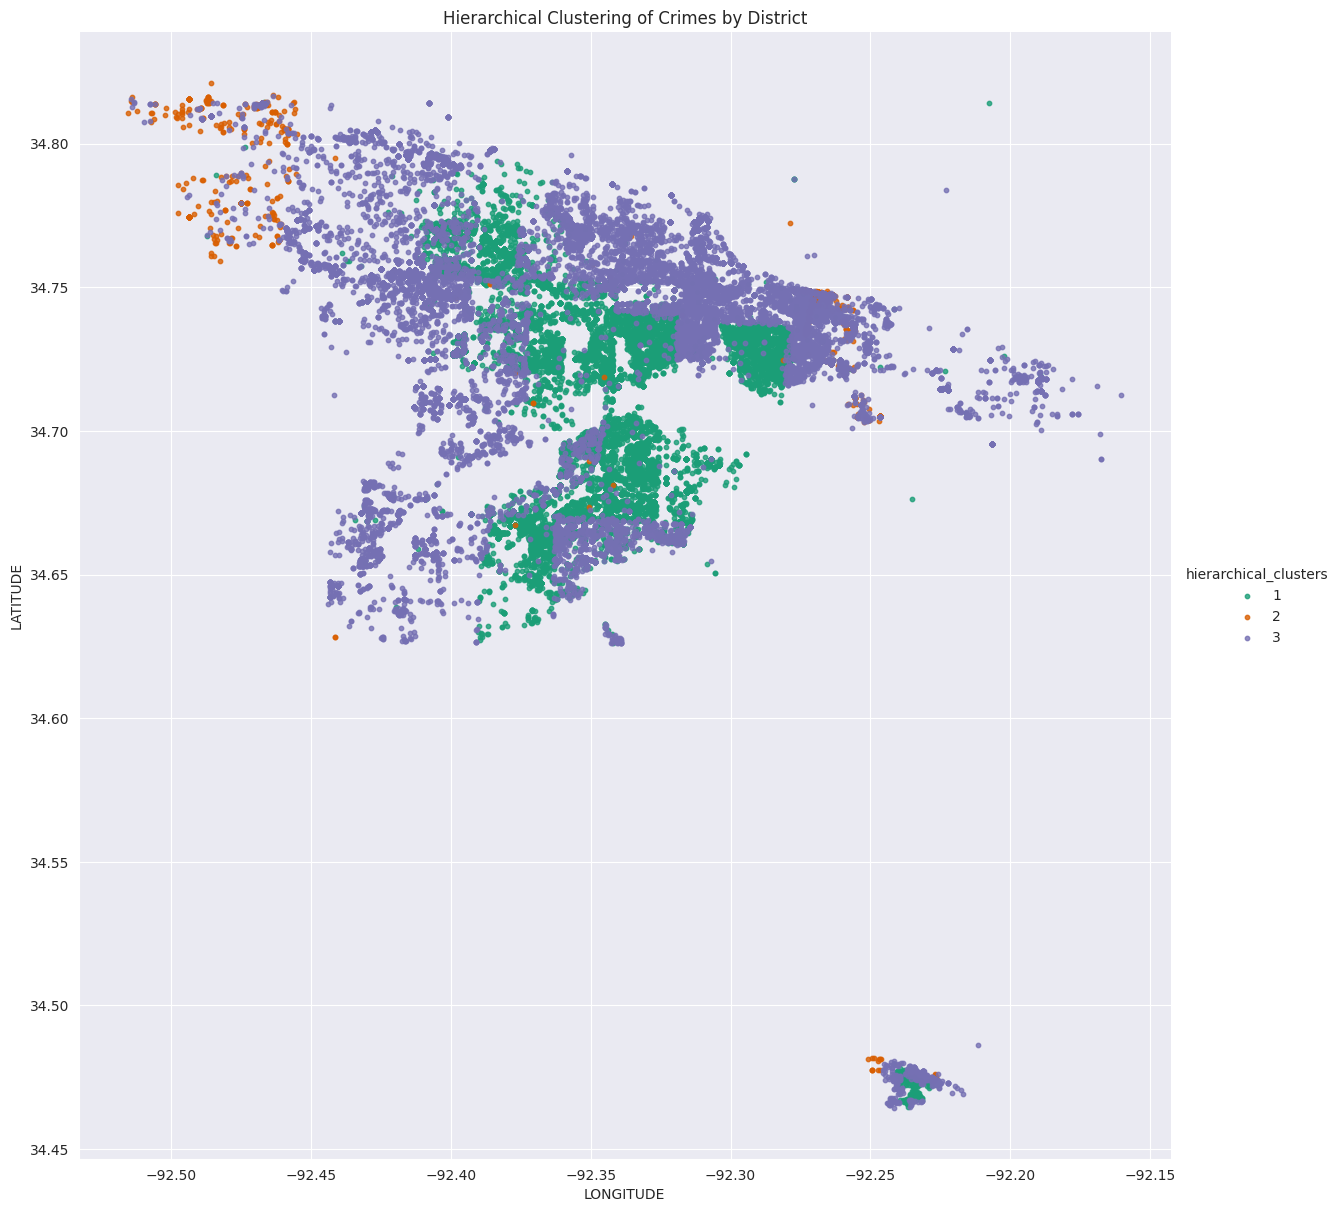

In [ ]:
new_crimes_data = crimes_data_clustered.loc[(crimes_data_clustered['LATITUDE']!=0)]
sns.lmplot(x = 'LONGITUDE',
           y = 'LATITUDE',
           data=new_crimes_data[:],
           fit_reg=False,
           hue="hierarchical_clusters",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D",
                        "s": 10})
ax = plt.gca()
ax.set_title("Hierarchical Clustering of Crimes by District")